# Model Comparison

This notebook compares the performance of various Large Language Models (LLMs) on specific tasks.

### Objectives:

* Identify the best performing LLM for summarization.
* Understand the strengths and weaknesses of different LLMs.
* Track progress in the field of LLMs.

### Models Included:

* The 5 Open Source Model and Close Source Model on OpenAI & GCP VertexAI.

### Tasks and Metrics:

* **Tasks:**
    * Compared TIB Dataset Result
    * Compared BBC News Dataset Result
* **Metrics:**
    * ROUGE, Grammar, Readability, Time Taken, BERT 

Results

1. **Section 1: Comparison with TIB Dataset Summary**

    1.1. Temperature Comparison

    1.2. Prompt Engineering Comparison

    1.3. Compare All Close Source

    1.4 Compare All Open Source

    1.5 Compare Best Open Source with ALl Close Source

2. **Section 2: Topics Comparison with BBC Dataset Summary**

    2.1. Compare All Close Source Topics

    2.2. Compare All Open Source Topics

    2.3. Topic Open & Close Source Comparison

    2.4 Compare GPT-3.5-Turbo with GPT-3.5-Turbo-RAG

    2.5 Compare GPT-3.5-Turbo-RAG with Gemini-Pro-RAG (Gemini unable to generate summary with it embedding. (Require fixing))
    

#### Install & Import Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from ast import literal_eval


In [3]:
def readTensorsString(tensorString: str):
    # get values between [] with regex
    pattern = r'\[(.*?)\]'
    matches = re.findall(pattern, tensorString)
    # string to numbers
    return [float(each) for each in matches]



def readGrammerList(grammar: str):
    try:
        # Replace problematic characters and evaluate the string
        cleaned_grammar = grammar.replace("...", "")  # Replace or modify as needed
        return [literal_eval(each) for each in re.findall(r"Match\((.*?)\)", cleaned_grammar)]
    except Exception as e:
        # Handle any exceptions or print the error for debugging
        print(f"Error processing grammar: {e}")
        return []


# get text between "score: " and ","
def getScore(text: str):
    if text == "100 words required.":
        return None
    pattern = r"score: (.*?),"
    matches = re.findall(pattern, text)
    return float(matches[0])

def process_df(df_original):
  """Processes the given df by adding a grammar_count column, splitting up the rouge list of dictionaries into different columns, and splitting the bert score into 3 columns.

  Args:
    df: A pandas DataFrame.

  Returns:
    A pandas DataFrame with the processed columns.
  """

  df = df_original.copy(deep=True)

  # Add a grammar_count column
  df['grammar_count'] = df['grammar'].apply(lambda x: len(x))

  df['rouge'] = df['rouge'].apply(lambda x: eval(x))
  
  # split up rouge column values list of dictionaries into different columns
  # add rouge1_f1, rouge2_f1, rougeL_f1 columns
  df['rouge1_f1'] = df['rouge'].apply(lambda x: x[0]['rouge-1']['f'])
  df['rouge2_f1'] = df['rouge'].apply(lambda x: x[0]['rouge-2']['f'])
  df['rougeL_f1'] = df['rouge'].apply(lambda x: x[0]['rouge-l']['f'])

  # create bert_score_f1
  df['bert_score_f1'] = df['bert_score'].apply(lambda x: x[0])
  
  return df

def count_words(text):
    words = text.split()
    return len(words)

### Section 1: Comparison with TIB Dataset Summary

In [4]:
# Defined distinct color for each model shown on graphs.
palette = sns.color_palette(["#674A40", "#50A3A4", "#FFD825", "#F95335", "#6667AB", "#000075", "#F6C3FF", "#42d4f4"])
palette

[(0.403921568627451, 0.2901960784313726, 0.25098039215686274),
 (0.3137254901960784, 0.6392156862745098, 0.6431372549019608),
 (1.0, 0.8470588235294118, 0.1450980392156863),
 (0.9764705882352941, 0.3254901960784314, 0.20784313725490197),
 (0.4, 0.403921568627451, 0.6705882352941176),
 (0.0, 0.0, 0.4588235294117647),
 (0.9647058823529412, 0.7647058823529411, 1.0),
 (0.25882352941176473, 0.8313725490196079, 0.9568627450980393)]

In [72]:
closed_source_web_result = pd.read_excel("../Process/result/closed_source_model_web.xlsx")

openai_api_result = pd.read_excel("../Process/result/closed_source_model_openai_api.xlsx")

vertex_api_result = pd.read_excel("../Process/result/closed_source_model_vertexai_api.xlsx")



closed_source_api_result = pd.concat([openai_api_result, vertex_api_result], ignore_index=True)


closed_source_api_result.head(1)

,model,method,max_tokens,num_tokens,transcript,original summary,summary,rouge,bert_score,bleu,time_taken,grammar,readability,prompt,temperature
0,gpt-3.5-turbo-1106,MapReduce,16385,6827,All right. So our next talk is called Hacking...,A firsthand look at efforts to improve diversi...,Professor Christina Tamba-Hester's talk on Hac...,"[{'rouge-1': {'r': 0.13690476190476192, 'p': 0...","(tensor([0.8656]), tensor([0.8255]), tensor([0...",8.954086e-156,21.383893,"[Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'me...",100 words required.,Write a concise summary of the following: {text},0


In [73]:
closed_source_api_result['model'].unique()

array(['gpt-3.5-turbo-1106', 'gpt-4', 'gpt-4-1106-preview',
       'gpt-3.5-turbo-0125', 'gpt-4-0125-preview', 'gemini-pro',
       'chat-bison-001', 'text-bison-001'], dtype=object)

In [74]:
open_source_sum_result = pd.read_excel("../Process/result/open_source_model.xlsx")

# top 5 Models
data = {
    'model': [
        'pszemraj/led-base-book-summary',
        'pszemraj/led-large-book-summary',
        'HHousen/distil-led-large-cnn-16384',
        'philschmid/bart-large-cnn-samsum',
        'pszemraj/long-t5-tglobal-base-16384-book-summary'
    ]
}

top_5_models = pd.DataFrame(data)


open_source_sum_result = open_source_sum_result[open_source_sum_result['model'].isin(top_5_models['model'])].reset_index(drop=True)



open_source_sum_result.head(1)

,model,method,max_tokens,transcript,original summary,summary,rouge,bert_score,bleu,time_taken,grammar,readability
0,HHousen/distil-led-large-cnn-16384,MapReduce,16384.0,All right. So our next talk is called Hacking...,A firsthand look at efforts to improve diversi...,There's a long history of discrimination agai...,"[{'rouge-1': {'r': 0.05952380952380952, 'p': 0...","(tensor([0.8402]), tensor([0.8062]), tensor([0...",2.897915e-156,56.447565,[Match({'ruleId': 'COMMA_PARENTHESIS_WHITESPAC...,100 words required.


In [75]:
# Performance not that good will not be used.
# open_source_t2t_result = pd.read_excel("../Process/result/open_source_model_t2t.xlsx")


#### Temperature Comparison

Compare models with varying temperature and observe summary result

In [76]:
desired_text = "Write a concise summary of the following:"

df = closed_source_api_result[closed_source_api_result["prompt"].str.contains(desired_text, case=False)]

df['bert_score'] = df['bert_score'].apply(readTensorsString)
df['readability_score'] = df['readability'].apply(getScore)
df['grammar'] = df['grammar'].apply(readGrammerList)
df['org_word_count'] = df['transcript'].apply(count_words)
df['sum_word_count'] = df['summary'].apply(count_words)

df_scores_processed = process_df(df)

df_scores_processed['data_point'] = df_scores_processed.groupby('transcript').ngroup()


Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)


C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3615435735.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bert_score'] = df['bert_score'].apply(readTensorsString)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3615435735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readability_score'] = df['readability'].apply(getScore)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3615435735.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [77]:
temperature_comparison = df_scores_processed[["model", "data_point", "time_taken", "grammar_count", "rouge1_f1", "rouge2_f1", "rougeL_f1", "bert_score_f1", "org_word_count" ,"sum_word_count", 'temperature']]
temperature_comparison = temperature_comparison.sort_values(by=['model', 'data_point']).reset_index(drop=True)
temperature_comparison

,model,data_point,time_taken,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1,org_word_count,sum_word_count,temperature
0,chat-bison-001,0,8.650586,0,0.137615,0.006944,0.128440,0.8598,5769,58,1
1,chat-bison-001,0,9.077720,1,0.181034,0.032362,0.137931,0.8652,5769,78,0
2,chat-bison-001,1,7.215228,1,0.161137,0.013158,0.142180,0.8377,6033,89,1
3,chat-bison-001,1,15.297707,0,0.132653,0.056537,0.132653,0.8489,6033,69,0
4,chat-bison-001,2,8.151463,0,0.166667,0.022901,0.125000,0.8551,6101,64,1
...,...,...,...,...,...,...,...,...,...,...,...
65,text-bison-001,2,4.877436,0,0.155556,0.016194,0.155556,0.8651,6101,49,0
66,text-bison-001,3,5.730538,0,0.091743,0.006557,0.082569,0.8589,5725,44,1
67,text-bison-001,3,5.010103,2,0.168142,0.012658,0.132743,0.8704,5725,55,0
68,text-bison-001,4,7.213316,3,0.135802,0.027273,0.111111,0.8202,5891,37,1


C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1799873062.py:24: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y=variable, hue='model', data=df[df['temperature'] == 1], ax=ax, palette=palette)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1799873062.py:24: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y=variable, hue='model', data=df[df['temperature'] == 1], ax=ax, palette=palette)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1799873062.py:24: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y=variable, hue='model', data=df[df['temperature'] == 1], ax=ax, palette=palette)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1799873062.py:24: UserWarning: The palette list has more values (8) than needed (6), which may not be in

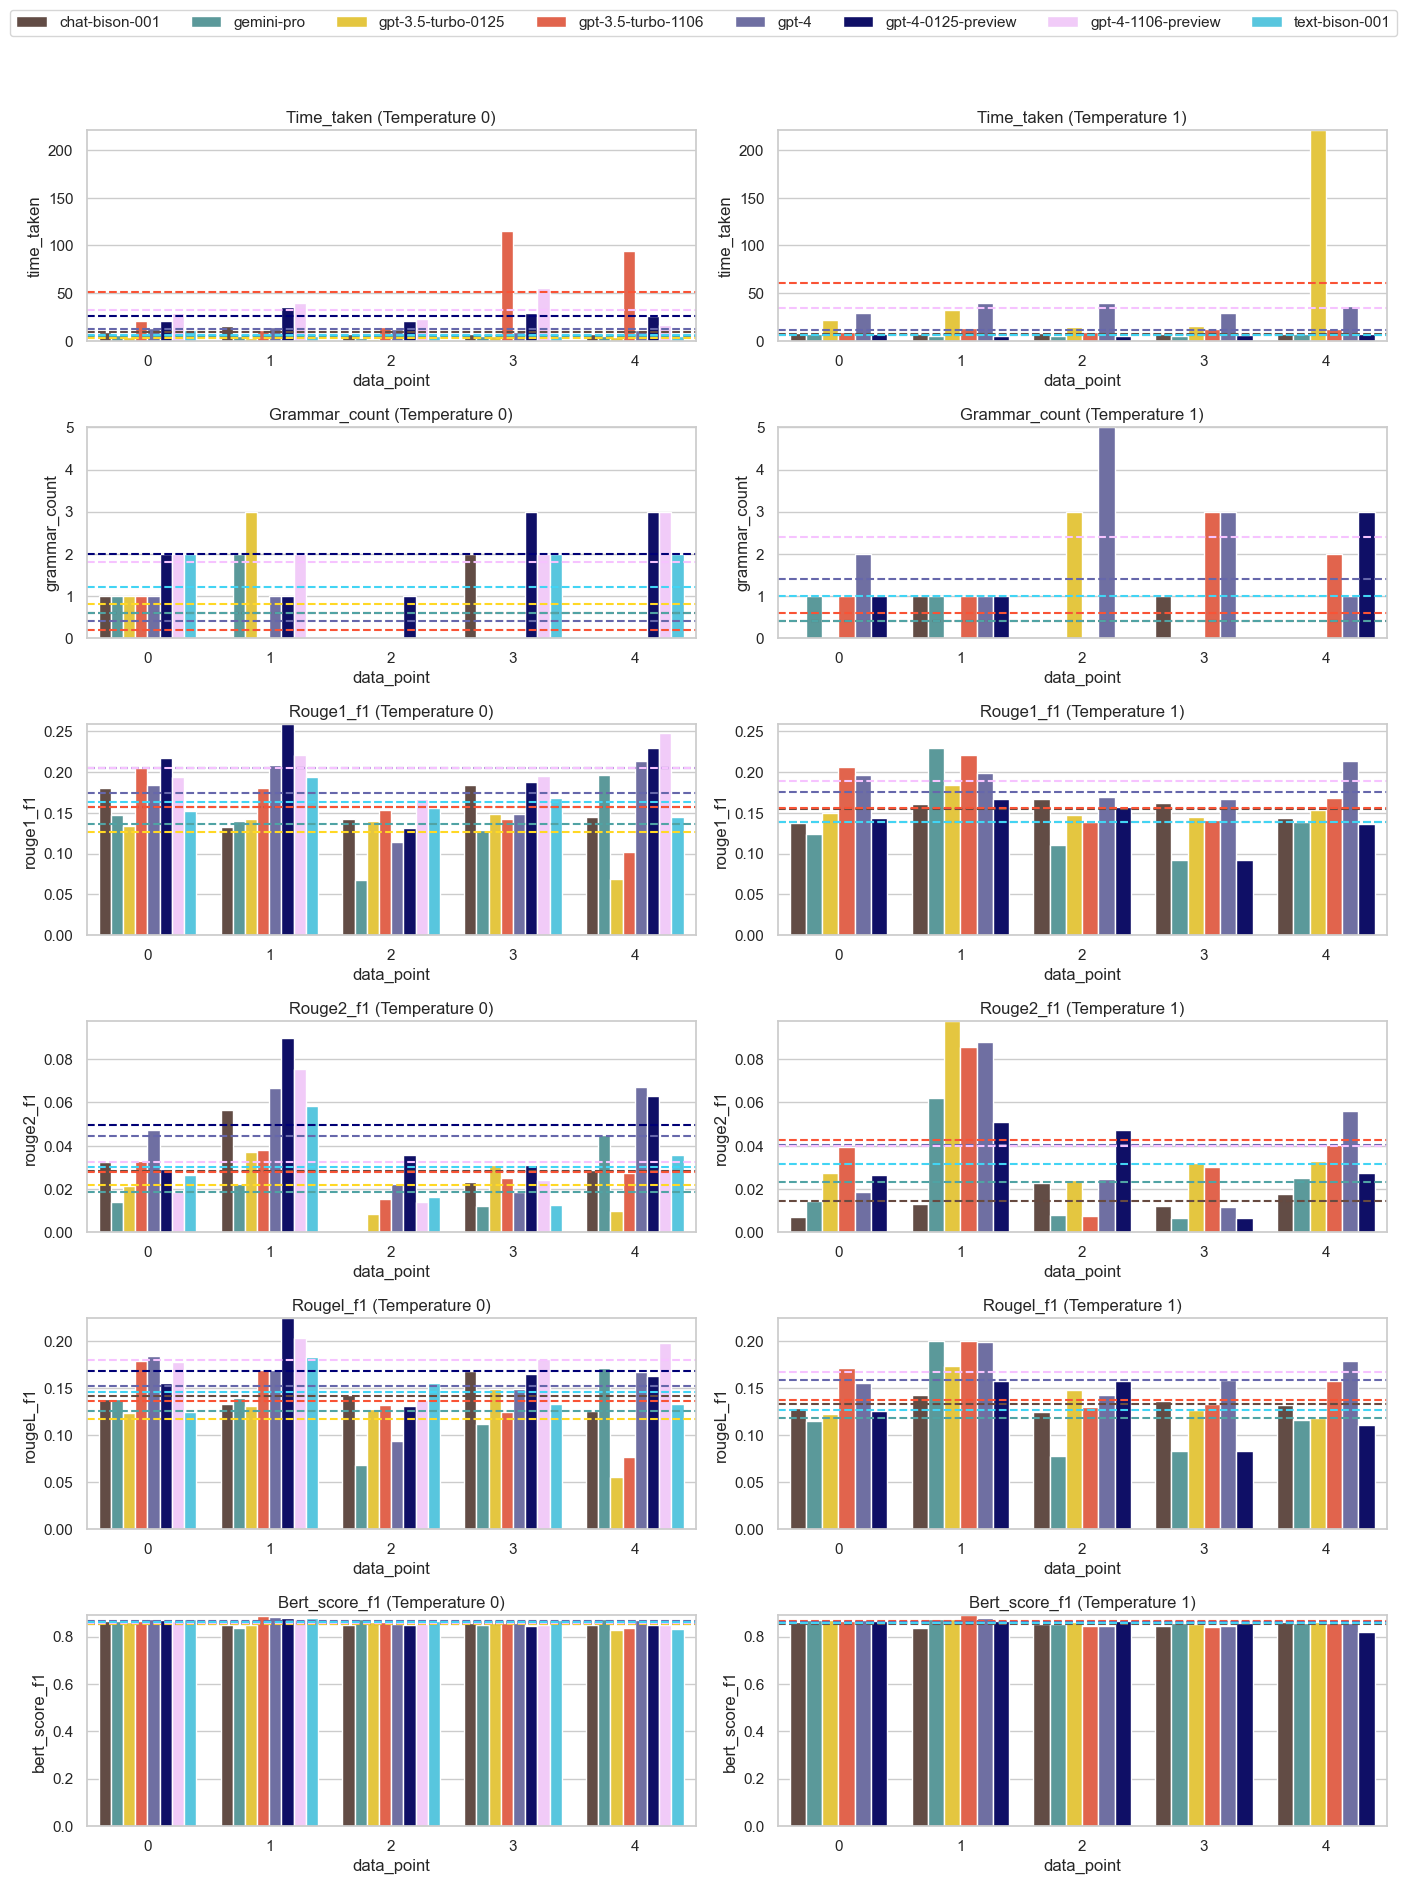

In [78]:
variables_to_plot = ['time_taken', 'grammar_count', 'rouge1_f1', 'rouge2_f1', 'rougeL_f1', 'bert_score_f1']


df = temperature_comparison

fig, axes = plt.subplots(nrows=len(variables_to_plot), ncols=2, figsize=(14, 18))


# Iterate through each variable and plot in the corresponding subplot
for i, variable in enumerate(variables_to_plot):
    # Left subplot for temperature 0
    
    ax = axes[i, 0]
    sns.barplot(x='data_point', y=variable, hue='model', data=df[df['temperature'] == 0], ax=ax, palette=palette)
    ax.set_title(f'{variable.capitalize()} (Temperature 0)')
   
    for j, model in enumerate(df['model'].unique()):
        average_value = df.loc[(df['model'] == model) & (df['temperature'] == 0), variable].mean()
        ax.axhline(average_value, color=palette[j], linewidth=1.5, linestyle='--')

    
    # Right subplot for temperature 1
    ax = axes[i, 1]
    sns.barplot(x='data_point', y=variable, hue='model', data=df[df['temperature'] == 1], ax=ax, palette=palette)
    axes[i, 1].set_title(f'{variable.capitalize()} (Temperature 1)')


    for j, model in enumerate(df['model'].unique()):
        average_value = df.loc[(df['model'] == model) & (df['temperature'] == 1), variable].mean()
        ax.axhline(average_value, color=palette[j], linewidth=1.5, linestyle='--')


    max_value = max(df[df['temperature'] == 0][variable].max(), df[df['temperature'] == 1][variable].max())


    for ax in [axes[i, 0], axes[i, 1]]:
        ax.set_ylim(0, max_value)
        # Remove legend from each subplot
        ax.legend().set_visible(False)

    # for ax in axes.flatten():
    #     for i, model in enumerate(df['model'].unique()):
    #         average_value = df[df['model'] == model][ax.get_ylabel()].mean()
    #         ax.axhline(average_value, color=palette[i], linewidth=1.5)




# Create a single legend for the entire figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=len(df['model'].unique()), loc="upper right", bbox_to_anchor=(1, 1.05))




# Adjust layout
plt.subplots_adjust(hspace=0.5)

plt.tight_layout()

# Show the plot
plt.show()

#### Prompt Engineering Comparison

Compare OpenAI models prompt engineering result and observe the performance.

In [79]:
prompt1 = """Write a concise summary of the following: {text}"""

prompt2 = """Write a concise yet comprehensive summary
        that highlights key topics and discussions from the webinar transcripts. Purpose of the summary is for users seek overviews before committing to the full video, and the summary should capture
          essential threads, providing a gist of the discussion. The intended purpose is to assist users in quickly grasping main points 
          and reinforcing learning post-viewing. 
          
          Keep the generated summary around 200 words for following context: 
          {text}"""



In [80]:
openai_models =  ['gpt-4', 'gpt-3.5-turbo-1106', 'gpt-4-1106-preview']

openai_prompt_api_result = closed_source_api_result[(closed_source_api_result["model"].isin(openai_models)) & (closed_source_api_result["temperature"] == 0)]
print(openai_prompt_api_result.shape)
openai_prompt_api_result = openai_prompt_api_result[openai_prompt_api_result['prompt'].apply(lambda x: any(item in x for item in [prompt1, prompt2]))].reset_index(drop=True)
# openai_prompt_api_result = openai_prompt_api_result[(openai_prompt_api_result['prompt'].str.contains(prompt1, case=False)) | openai_prompt_api_result['prompt'].str.contains(prompt2, case=False)].reset_index(drop=True)
print(openai_prompt_api_result.shape)
openai_prompt_api_result.head(1)

(62, 15)
(30, 15)


,model,method,max_tokens,num_tokens,transcript,original summary,summary,rouge,bert_score,bleu,time_taken,grammar,readability,prompt,temperature
0,gpt-3.5-turbo-1106,MapReduce,16385,6827,All right. So our next talk is called Hacking...,A firsthand look at efforts to improve diversi...,Professor Christina Tamba-Hester's talk on Hac...,"[{'rouge-1': {'r': 0.13690476190476192, 'p': 0...","(tensor([0.8656]), tensor([0.8255]), tensor([0...",8.954086e-156,21.383893,"[Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'me...",100 words required.,Write a concise summary of the following: {text},0


In [81]:
df = openai_prompt_api_result

df['bert_score'] = df['bert_score'].apply(readTensorsString)
df['readability_score'] = df['readability'].apply(getScore)
df['grammar'] = df['grammar'].apply(readGrammerList)
df['org_word_count'] = df['transcript'].apply(count_words)
df['sum_word_count'] = df['summary'].apply(count_words)

df_scores_processed = process_df(df)

df_scores_processed['data_point'] = df_scores_processed.groupby('transcript').ngroup()


In [82]:
prompt_comparison = df_scores_processed[["model", "data_point", "time_taken", "grammar_count", "rouge1_f1", "rouge2_f1", "rougeL_f1", "bert_score_f1", "org_word_count" ,"sum_word_count", 'prompt']]
prompt_comparison = prompt_comparison.sort_values(by=['model', 'data_point']).reset_index(drop=True)
prompt_comparison

,model,data_point,time_taken,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1,org_word_count,sum_word_count,prompt
0,gpt-3.5-turbo-1106,0,21.383893,1,0.205357,0.032680,0.178571,0.8656,5769,78,Write a concise summary of the following: {text}
1,gpt-3.5-turbo-1106,0,29.185579,1,0.229075,0.051613,0.185022,0.8728,5769,85,Write a concise yet comprehensive summary\n ...
2,gpt-3.5-turbo-1106,1,11.230562,0,0.180791,0.037879,0.169492,0.8856,6033,46,Write a concise summary of the following: {text}
3,gpt-3.5-turbo-1106,1,39.523345,3,0.178218,0.039474,0.158416,0.8618,6033,100,Write a concise yet comprehensive summary\n ...
4,gpt-3.5-turbo-1106,2,14.139802,0,0.153846,0.015504,0.131868,0.8622,6101,61,Write a concise summary of the following: {text}
5,gpt-3.5-turbo-1106,2,36.286263,0,0.170854,0.028070,0.140704,0.8491,6101,94,Write a concise yet comprehensive summary\n ...
6,gpt-3.5-turbo-1106,3,115.299044,0,0.142222,0.024922,0.124444,0.8576,5725,62,Write a concise summary of the following: {text}
7,gpt-3.5-turbo-1106,3,36.948316,0,0.175000,0.028653,0.150000,0.8499,5725,99,Write a concise yet comprehensive summary\n ...
8,gpt-3.5-turbo-1106,4,93.767647,0,0.101911,0.027273,0.076433,0.8376,5891,41,Write a concise summary of the following: {text}
9,gpt-3.5-turbo-1106,4,304.766041,0,0.162500,0.036364,0.100000,0.8494,5891,38,Write a concise yet comprehensive summary\n ...


C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1807272840.py:45: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x='data_point', y=variable, hue='model', data=df[df['prompt'].str.contains(prompt1, case=False)], ax=ax, palette=palette)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1807272840.py:55: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x='data_point', y=variable, hue='model', data=df[df['prompt'].str.contains(prompt2, case=False)], ax=ax, palette=palette)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1807272840.py:45: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x='data_point', y=variable, hue='model', data=df[df['prompt'].str.contains(prompt1, case=False)], ax=ax, palette=palette)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1807272840.py:55: UserWarning: T

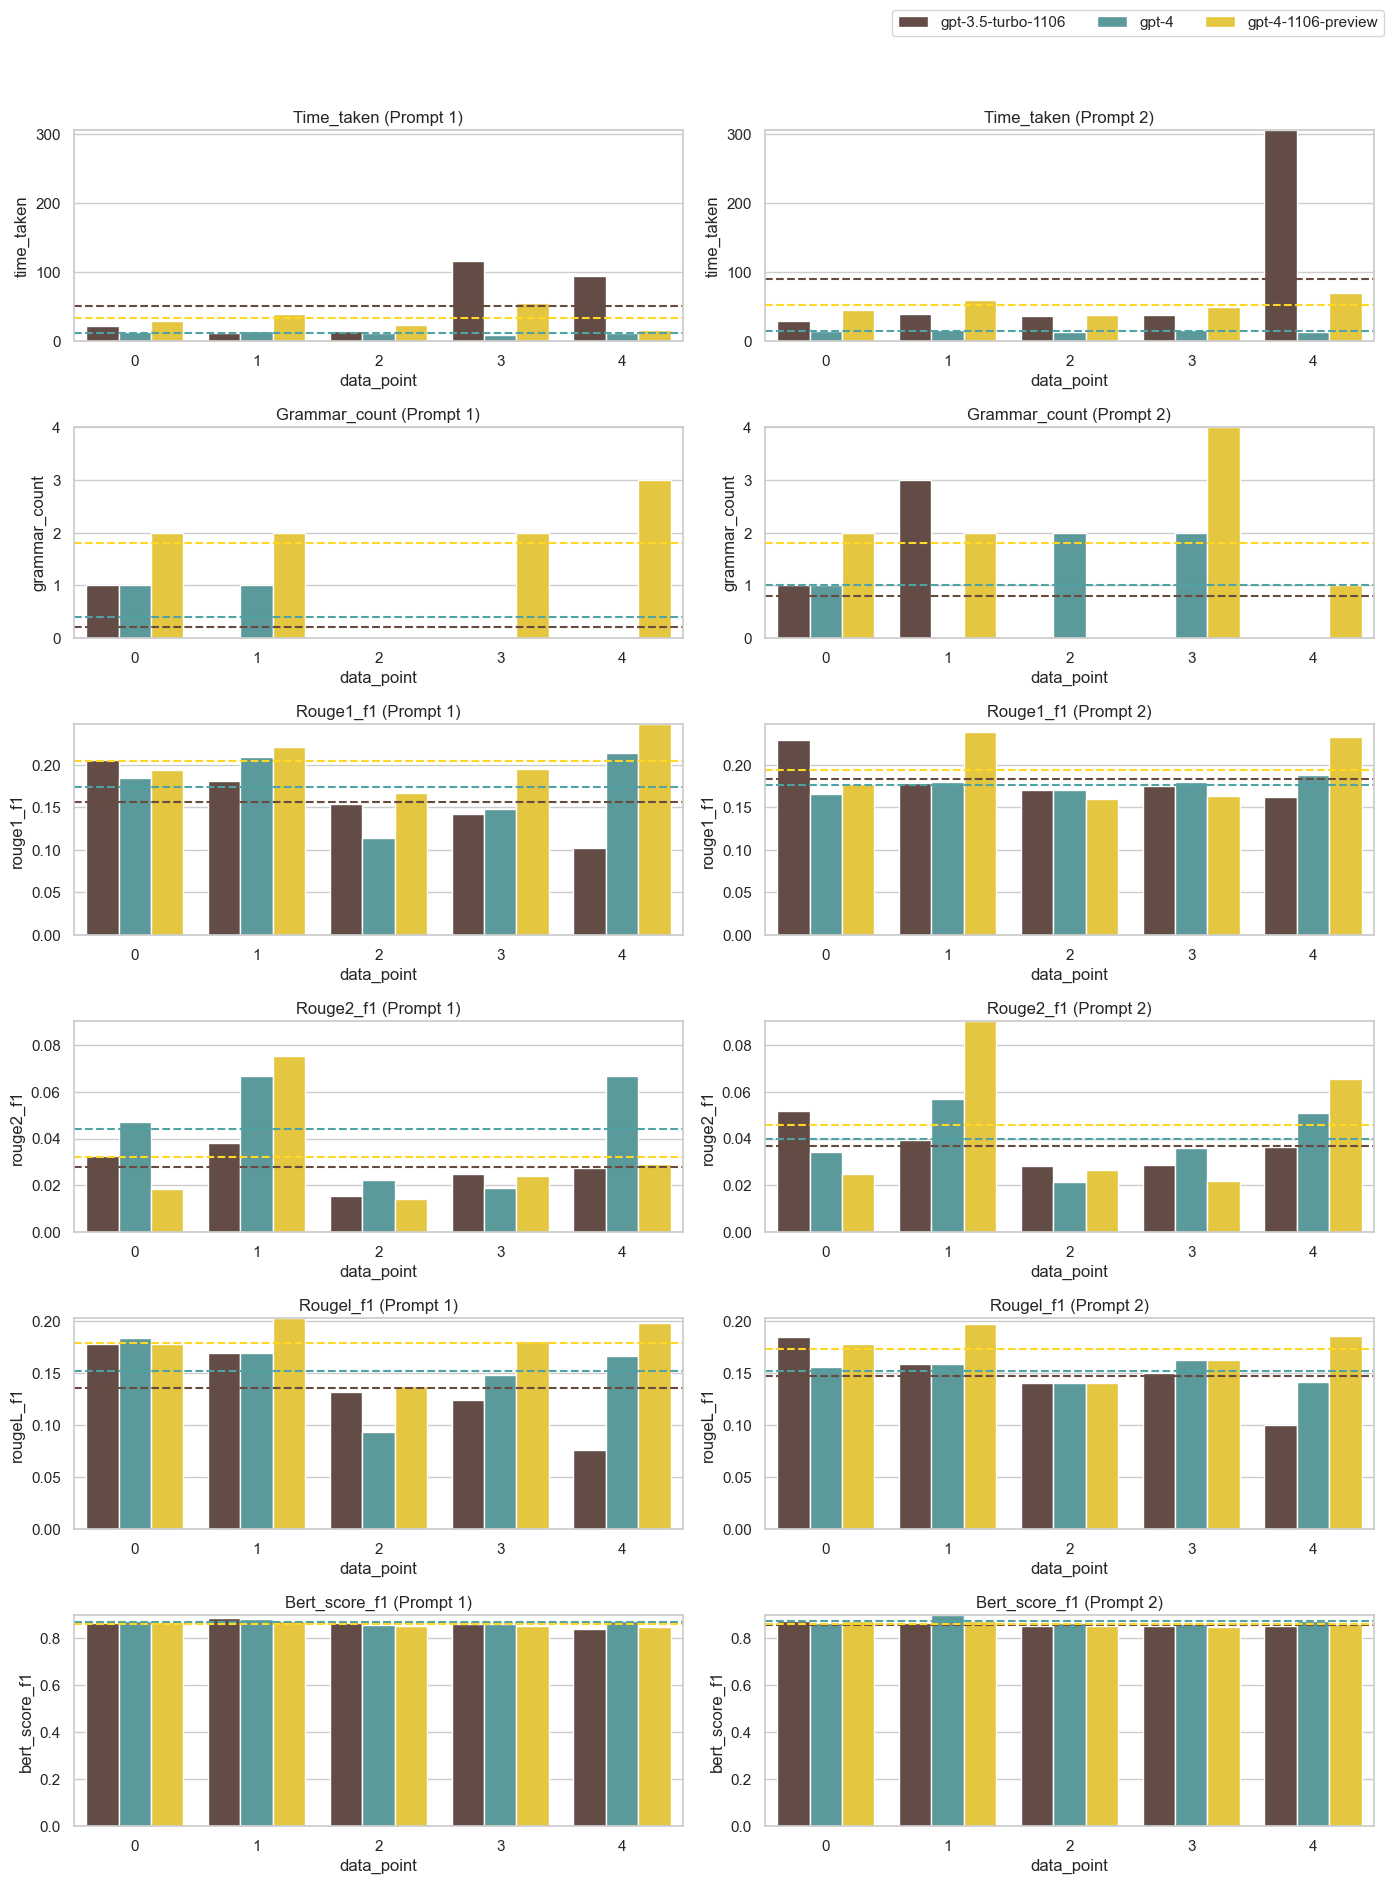

In [83]:
variables_to_plot = ['time_taken', 'grammar_count', 'rouge1_f1', 'rouge2_f1', 'rougeL_f1', 'bert_score_f1']


df = prompt_comparison

# # Create subplots
# fig, axes = plt.subplots(nrows=len(variables_to_plot), ncols=2, figsize=(14, 18))


# # Iterate through each variable and plot in the corresponding subplot
# for i, variable in enumerate(variables_to_plot):
#     # Left subplot for temperature 0
    
#     ax = axes[i, 0]
#     sns.barplot(x='data_point', y=variable, hue='model', data=df[df['prompt'].str.contains(prompt1, case=False)], ax=ax, palette=palette)
#     ax.set_title(f'{variable.capitalize()} (Prompt1)')
   
#     for j, model in enumerate(df['model'].unique()):
#         average_value = df.loc[(df['model'] == model) & (df['prompt'].str.contains(prompt1, case=False)), variable].mean()
#         ax.axhline(average_value, color=palette[j], linewidth=1.5, linestyle='--')

    
#     # Right subplot for temperature 1
#     ax = axes[i, 1]
#     sns.barplot(x='data_point', y=variable, hue='model', data=df[df['prompt'].str.contains(prompt2, case=False)], ax=axes[i, 1], palette=palette)
#     axes[i, 1].set_title(f'{variable.capitalize()} (Prompt2)')


#     for j, model in enumerate(df['model'].unique()):
#         average_value = df.loc[(df['model'] == model) & (df['prompt'].str.contains(prompt2, case=False)), variable].mean()
#         ax.axhline(average_value, color=palette[j], linewidth=1.5, linestyle='--')


#     max_value = max(df[df['prompt'].str.contains(prompt1, case=False)][variable].max(), df[df['prompt'].str.contains(prompt2, case=False)][variable].max())


fig, axes = plt.subplots(nrows=len(variables_to_plot), ncols=2, figsize=(14, 18))


# Iterate through each variable and plot in the corresponding subplot
for i, variable in enumerate(variables_to_plot):
    # Left subplot for temperature 0
    
    ax = axes[i, 0]
    sns.barplot(x='data_point', y=variable, hue='model', data=df[df['prompt'].str.contains(prompt1, case=False)], ax=ax, palette=palette)
    ax.set_title(f'{variable.capitalize()} (Prompt 1)')
   
    for j, model in enumerate(df['model'].unique()):
        average_value = df.loc[(df['model'] == model) & (df['prompt'].str.contains(prompt1, case=False)), variable].mean()
        ax.axhline(average_value, color=palette[j], linewidth=1.5, linestyle='--')

    
    # Right subplot for temperature 1
    ax = axes[i, 1]
    sns.barplot(x='data_point', y=variable, hue='model', data=df[df['prompt'].str.contains(prompt2, case=False)], ax=ax, palette=palette)
    ax.set_title(f'{variable.capitalize()} (Prompt 2)')


    for j, model in enumerate(df['model'].unique()):
        average_value = df.loc[(df['model'] == model) & (df['prompt'].str.contains(prompt2, case=False)), variable].mean()
        ax.axhline(average_value, color=palette[j], linewidth=1.5, linestyle='--')


    max_value = max(df[df['prompt'].str.contains(prompt1, case=False)][variable].max(), df[df['prompt'].str.contains(prompt2, case=False)][variable].max())


    for ax in [axes[i, 0], axes[i, 1]]:
        ax.set_ylim(0, max_value)
        # Remove legend from each subplot
        ax.legend().set_visible(False)

    # for ax in axes.flatten():
    #     for i, model in enumerate(df['model'].unique()):
    #         average_value = df[df['model'] == model][ax.get_ylabel()].mean()
    #         ax.axhline(average_value, color=palette[i], linewidth=1.5)




# Create a single legend for the entire figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=len(df['model'].unique()), loc="upper right", bbox_to_anchor=(1, 1.05))




# Adjust layout
plt.subplots_adjust(hspace=0.5)

plt.tight_layout()

# Show the plot
plt.show()

#### Compare All Closed Source Model

In [84]:
closed_source_result = pd.concat([closed_source_web_result, closed_source_api_result], axis=0).reset_index(drop=True)
closed_source_result.shape

(127, 15)

In [85]:
df = closed_source_result[(closed_source_result['temperature'] == 0) & (closed_source_result['prompt'].str.contains(prompt1, case=False))].reset_index(drop=True)
print(df.shape)
df['bert_score'] = df['bert_score'].apply(readTensorsString)
df['readability_score'] = df['readability'].apply(getScore)
df['grammar'] = df['grammar'].apply(readGrammerList)
df['org_word_count'] = df['transcript'].apply(count_words)
df['sum_word_count'] = df['summary'].apply(count_words)

df_scores_processed = process_df(df)

df_scores_processed.head(1)

(40, 15)


,model,method,max_tokens,transcript,original summary,summary,rouge,bert_score,bleu,time_taken,...,prompt,temperature,readability_score,org_word_count,sum_word_count,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1
0,gpt-3.5-turbo-1106,MapReduce,16385,All right. So our next talk is called Hacking...,A firsthand look at efforts to improve diversi...,Professor Christina Tamba-Hester's talk on Hac...,"[{'rouge-1': {'r': 0.13690476190476192, 'p': 0...","[0.8656, 0.8255, 0.8451]",8.954086e-156,21.383893,...,Write a concise summary of the following: {text},0.0,NaN,5769,78,1,0.205357,0.03268,0.178571,0.8656


In [86]:
df_scores_processed['data_point'] = df_scores_processed.groupby('transcript').ngroup()

In [87]:
closed_source_comparison = df_scores_processed[["model", "data_point", "time_taken", "grammar_count", "rouge1_f1", "rouge2_f1", "rougeL_f1", "bert_score_f1", "org_word_count" ,"sum_word_count"]]
closed_source_comparison = closed_source_comparison.sort_values(by=['model', 'data_point']).reset_index(drop=True)
closed_source_comparison

,model,data_point,time_taken,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1,org_word_count,sum_word_count
0,chat-bison-001,0,9.077720,1,0.181034,0.032362,0.137931,0.8652,5769,78
1,chat-bison-001,1,15.297707,0,0.132653,0.056537,0.132653,0.8489,6033,69
2,chat-bison-001,2,7.604177,0,0.142180,0.000000,0.142180,0.8468,6101,107
3,chat-bison-001,3,6.923247,2,0.184739,0.023055,0.168675,0.8568,5725,86
4,chat-bison-001,4,7.333745,0,0.144928,0.028777,0.125604,0.8471,5891,95
5,gemini-pro,0,6.114026,1,0.147465,0.014085,0.138249,0.8677,5769,54
6,gemini-pro,1,4.874872,2,0.139785,0.022140,0.139785,0.8375,6033,55
7,gemini-pro,2,2.656942,0,0.067568,0.000000,0.067568,0.8740,6101,13
8,gemini-pro,3,4.832208,0,0.128755,0.012232,0.111588,0.8500,5725,66
9,gemini-pro,4,5.093334,0,0.196319,0.044843,0.171779,0.8749,5891,40


Before adding new "gpt-4-0125-preview", "gpt-3.5-turbo-0125".

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\2004435735.py:17: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='grammar_count', hue='model', data=df, ax=axes[0, 0], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\2004435735.py:21: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df, ax=axes[0, 1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\2004435735.py:25: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df, ax=axes[0, 2], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\2004435735.py:29: UserWarning: The palette list has more values (8) than needed (6), which may no

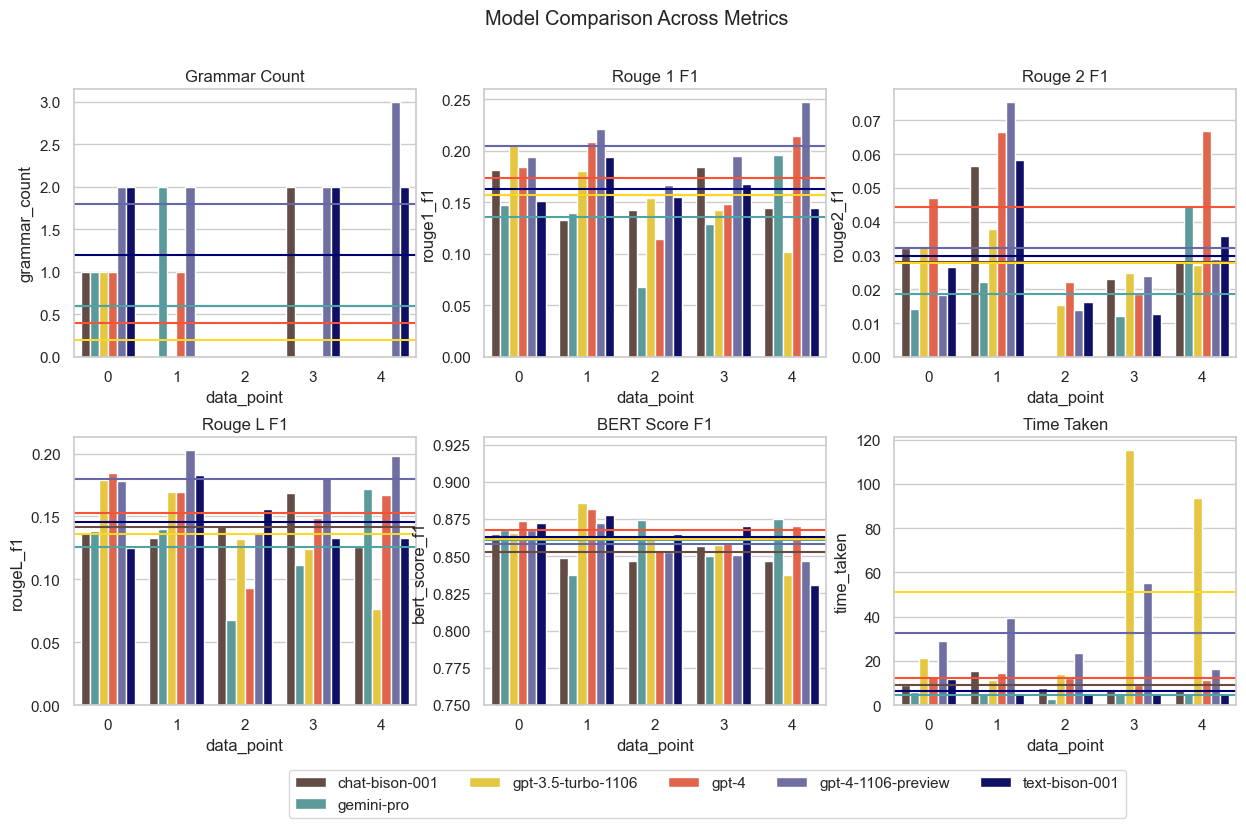

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame named 'df'
# Replace this with your actual DataFrame name if different
df = closed_source_comparison[~closed_source_comparison["model"].isin(["gpt-4-0125-preview", "gpt-3.5-turbo-0125","Gemini Pro - web", "gpt-3.5-turbo-1106 - web"])]

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Model Comparison Across Metrics')

# Plot grammar_count
sns.barplot(x='data_point', y='grammar_count', hue='model', data=df, ax=axes[0, 0], palette=palette, legend=False)
axes[0, 0].set_title('Grammar Count')

# Plot Rouge 1 F1
sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df, ax=axes[0, 1], palette=palette, legend=False)
axes[0, 1].set_title('Rouge 1 F1')

# Plot Rouge 2 F1
sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df, ax=axes[0, 2], palette=palette, legend=False)
axes[0, 2].set_title('Rouge 2 F1')

# Plot Rouge L F1
sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df, ax=axes[1, 0], palette=palette, legend=False)
axes[1, 0].set_title('Rouge L F1')

# Plot BERT Score F1
sns.barplot(x='data_point', y='bert_score_f1', hue='model', data=df, ax=axes[1, 1], palette=palette, legend=False)
axes[1, 1].set_ylim(0.75, None)
axes[1, 1].set_title('BERT Score F1')

# Plot Time Taken
sns.barplot(x='data_point', y='time_taken', hue='model', data=df, ax=axes[1, 2], palette=palette, legend=True)
axes[1, 2].set_title('Time Taken')

plt.legend(ncol=len(df.columns)/2, loc="lower right", bbox_to_anchor=(0.7, -0.45))

for ax in axes.flatten():
    for i, model in enumerate(df['model'].unique()):
        average_value = df[df['model'] == model][ax.get_ylabel()].mean()
        ax.axhline(average_value, color=palette[i], linewidth=1.5)

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()

After adding new "gpt-4-0125-preview", "gpt-3.5-turbo-0125" and keep gpt model only

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\950049246.py:15: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='grammar_count', hue='model', data=df, ax=axes[0, 0], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\950049246.py:19: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df, ax=axes[0, 1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\950049246.py:23: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df, ax=axes[0, 2], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\950049246.py:27: UserWarning: The palette list has more values (8) than needed (5), which may not be

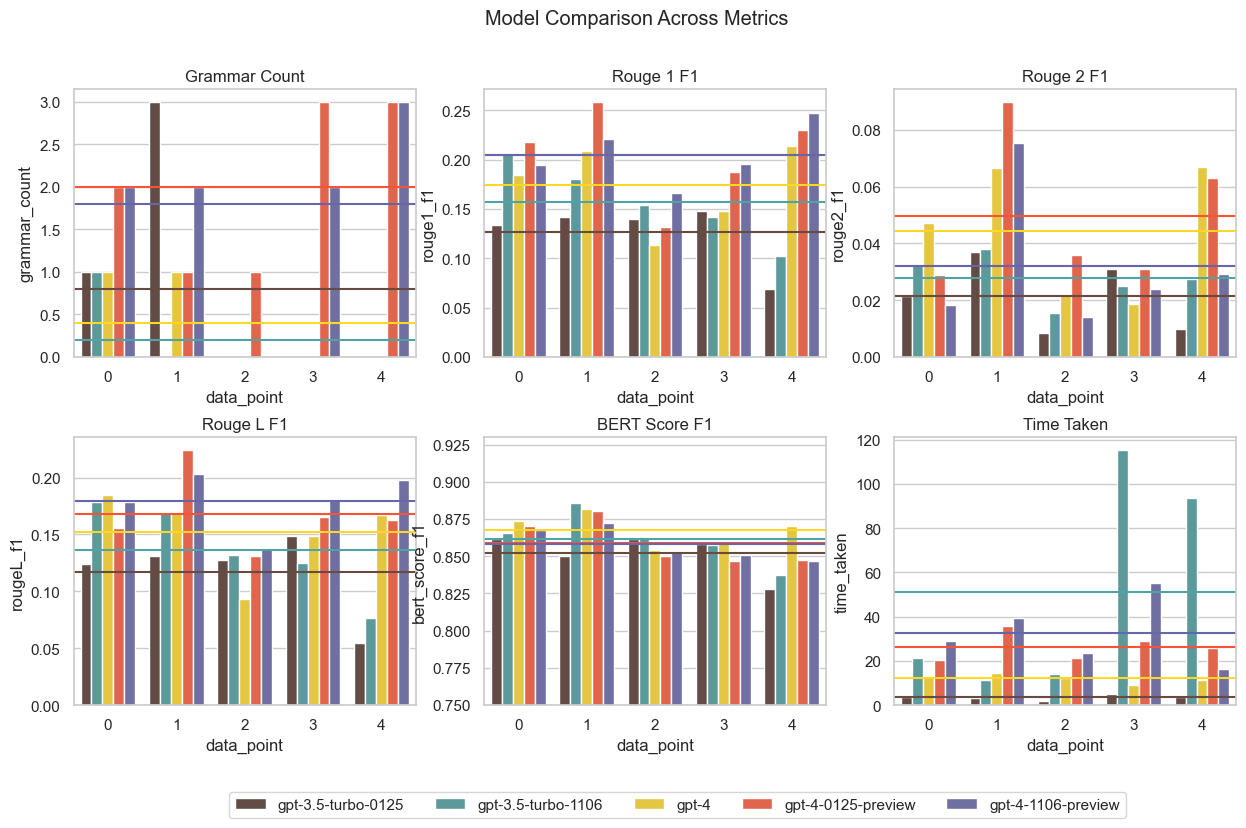

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove both web version result, time taken was too long for comparison.
df = closed_source_comparison[closed_source_comparison["model"].str.contains('gpt', case=False)]

sns.set(style="whitegrid")

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Model Comparison Across Metrics')

# Plot grammar_count
sns.barplot(x='data_point', y='grammar_count', hue='model', data=df, ax=axes[0, 0], palette=palette, legend=False)
axes[0, 0].set_title('Grammar Count')

# Plot Rouge 1 F1
sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df, ax=axes[0, 1], palette=palette, legend=False)
axes[0, 1].set_title('Rouge 1 F1')

# Plot Rouge 2 F1
sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df, ax=axes[0, 2], palette=palette, legend=False)
axes[0, 2].set_title('Rouge 2 F1')

# Plot Rouge L F1
sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df, ax=axes[1, 0], palette=palette, legend=False)
axes[1, 0].set_title('Rouge L F1')

# Plot BERT Score F1
sns.barplot(x='data_point', y='bert_score_f1', hue='model', data=df, ax=axes[1, 1], palette=palette, legend=False)
axes[1, 1].set_ylim(0.75, None)
axes[1, 1].set_title('BERT Score F1')

# Plot Time Taken
sns.barplot(x='data_point', y='time_taken', hue='model', data=df, ax=axes[1, 2], palette=palette, legend=True)
axes[1, 2].set_title('Time Taken')

plt.legend(ncol=len(df.columns), loc="lower right", bbox_to_anchor=(0.7, -0.45))

for ax in axes.flatten():
    for i, model in enumerate(df['model'].unique()):
        average_value = df[df['model'] == model][ax.get_ylabel()].mean()
        ax.axhline(average_value, color=palette[i], linewidth=1.5)

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()

#### Compare All Open Source

In [90]:
opened_source_result = pd.concat([open_source_sum_result], axis=0).reset_index(drop=True)
df = opened_source_result
print(df.shape)

df['bert_score'] = df['bert_score'].apply(readTensorsString)
df['readability_score'] = df['readability'].apply(getScore)
df['grammar'] = df['grammar'].apply(readGrammerList)
df['org_word_count'] = df['transcript'].apply(count_words)
df['sum_word_count'] = df['summary'].apply(count_words)

df_scores_processed = process_df(df)

df_scores_processed.head(1)

(25, 12)


,model,method,max_tokens,transcript,original summary,summary,rouge,bert_score,bleu,time_taken,grammar,readability,readability_score,org_word_count,sum_word_count,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1
0,HHousen/distil-led-large-cnn-16384,MapReduce,16384.0,All right. So our next talk is called Hacking...,A firsthand look at efforts to improve diversi...,There's a long history of discrimination agai...,"[{'rouge-1': {'r': 0.05952380952380952, 'p': 0...","[0.8402, 0.8062, 0.8228]",2.897915e-156,56.447565,"[{'ruleId': 'COMMA_PARENTHESIS_WHITESPACE', 'm...",100 words required.,NaN,5769,56,4,0.098039,0.028269,0.088235,0.8402


In [91]:
df_scores_processed['data_point'] = df_scores_processed.groupby('transcript').ngroup()


In [92]:
opened_source_comparison = df_scores_processed[["model", "data_point", "time_taken", "grammar_count", "rouge1_f1", "rouge2_f1", "rougeL_f1", "bert_score_f1", "sum_word_count"]]
opened_source_comparison = opened_source_comparison.sort_values(by=['model', 'data_point']).reset_index(drop=True)
opened_source_comparison

,model,data_point,time_taken,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1,sum_word_count
0,HHousen/distil-led-large-cnn-16384,0,56.447565,4,0.098039,0.028269,0.088235,0.8402,56
1,HHousen/distil-led-large-cnn-16384,1,59.342699,3,0.178771,0.060836,0.178771,0.8606,49
2,HHousen/distil-led-large-cnn-16384,2,52.308226,2,0.113636,0.007968,0.090909,0.8392,55
3,HHousen/distil-led-large-cnn-16384,3,53.250083,4,0.078049,0.013514,0.078049,0.8136,40
4,HHousen/distil-led-large-cnn-16384,4,50.630509,3,0.192771,0.034783,0.156627,0.8404,52
5,philschmid/bart-large-cnn-samsum,0,86.113577,1,0.135135,0.027119,0.126126,0.8545,66
6,philschmid/bart-large-cnn-samsum,1,107.419945,2,0.213904,0.090592,0.203209,0.8846,76
7,philschmid/bart-large-cnn-samsum,2,91.457570,5,0.181818,0.029197,0.149733,0.8493,79
8,philschmid/bart-large-cnn-samsum,3,89.530636,2,0.157895,0.049536,0.149123,0.8566,62
9,philschmid/bart-large-cnn-samsum,4,81.850148,0,0.169492,0.041667,0.169492,0.8464,57


C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4102921466.py:17: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='grammar_count', hue='model', data=df, ax=axes[0, 0], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4102921466.py:21: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df, ax=axes[0, 1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4102921466.py:25: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df, ax=axes[0, 2], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4102921466.py:29: UserWarning: The palette list has more values (8) than needed (5), which may no

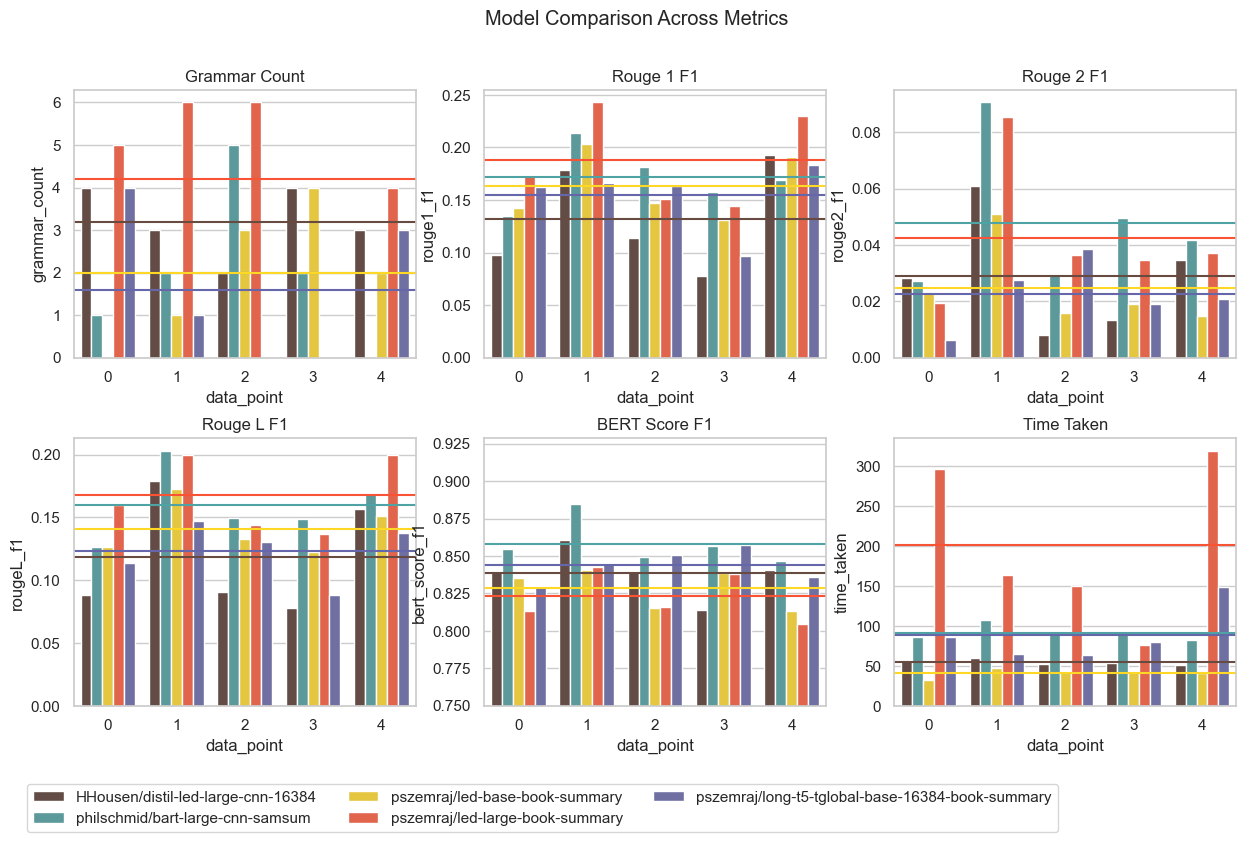

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame named 'df'
# Replace this with your actual DataFrame name if different
df = opened_source_comparison

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Model Comparison Across Metrics')

# Plot grammar_count
sns.barplot(x='data_point', y='grammar_count', hue='model', data=df, ax=axes[0, 0], palette=palette, legend=False)
axes[0, 0].set_title('Grammar Count')

# Plot Rouge 1 F1
sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df, ax=axes[0, 1], palette=palette, legend=False)
axes[0, 1].set_title('Rouge 1 F1')

# Plot Rouge 2 F1
sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df, ax=axes[0, 2], palette=palette, legend=False)
axes[0, 2].set_title('Rouge 2 F1')

# Plot Rouge L F1
sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df, ax=axes[1, 0], palette=palette, legend=False)
axes[1, 0].set_title('Rouge L F1')

# Plot BERT Score F1
sns.barplot(x='data_point', y='bert_score_f1', hue='model', data=df, ax=axes[1, 1], palette=palette, legend=False)
axes[1, 1].set_ylim(0.75, None)
axes[1, 1].set_title('BERT Score F1')

# Plot Time Taken
sns.barplot(x='data_point', y='time_taken', hue='model', data=df, ax=axes[1, 2], palette=palette, legend=True)
axes[1, 2].set_title('Time Taken')

plt.legend(ncol=3, loc="lower right", bbox_to_anchor=(0.5, -0.5))


for ax in axes.flatten():
    for i, model in enumerate(df['model'].unique()):
        average_value = df[df['model'] == model][ax.get_ylabel()].mean()
        ax.axhline(average_value, color=palette[i], linewidth=1.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()

In [94]:
closed_source_comparison

,model,data_point,time_taken,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1,org_word_count,sum_word_count
0,chat-bison-001,0,9.077720,1,0.181034,0.032362,0.137931,0.8652,5769,78
1,chat-bison-001,1,15.297707,0,0.132653,0.056537,0.132653,0.8489,6033,69
2,chat-bison-001,2,7.604177,0,0.142180,0.000000,0.142180,0.8468,6101,107
3,chat-bison-001,3,6.923247,2,0.184739,0.023055,0.168675,0.8568,5725,86
4,chat-bison-001,4,7.333745,0,0.144928,0.028777,0.125604,0.8471,5891,95
5,gemini-pro,0,6.114026,1,0.147465,0.014085,0.138249,0.8677,5769,54
6,gemini-pro,1,4.874872,2,0.139785,0.022140,0.139785,0.8375,6033,55
7,gemini-pro,2,2.656942,0,0.067568,0.000000,0.067568,0.8740,6101,13
8,gemini-pro,3,4.832208,0,0.128755,0.012232,0.111588,0.8500,5725,66
9,gemini-pro,4,5.093334,0,0.196319,0.044843,0.171779,0.8749,5891,40


#### Best Open Source & Close Source Models

In [95]:
# top 5 Models
data = {
    'model': [
        'gpt-4',
        'gpt-3.5-turbo-1106',
        'gpt-4-1106-preview',
        'text-bison-001'
    ]
}

top_3_closed_source_models = pd.DataFrame(data)


closed_source_comparison = closed_source_comparison[closed_source_comparison['model'].isin(top_3_closed_source_models['model'])].reset_index(drop=True)


data = {
    'model': [
        'philschmid/bart-large-cnn-samsum',
        'pszemraj/led-base-book-summary',
    ]
}

top_3_opened_source_models = pd.DataFrame(data)


opened_source_comparison = opened_source_comparison[opened_source_comparison['model'].isin(top_3_opened_source_models['model'])].reset_index(drop=True)

all_comparison = pd.concat([closed_source_comparison, opened_source_comparison], ignore_index=True)
all_comparison

,model,data_point,time_taken,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1,org_word_count,sum_word_count
0,gpt-3.5-turbo-1106,0,21.383893,1,0.205357,0.032680,0.178571,0.8656,5769.0,78
1,gpt-3.5-turbo-1106,1,11.230562,0,0.180791,0.037879,0.169492,0.8856,6033.0,46
2,gpt-3.5-turbo-1106,2,14.139802,0,0.153846,0.015504,0.131868,0.8622,6101.0,61
3,gpt-3.5-turbo-1106,3,115.299044,0,0.142222,0.024922,0.124444,0.8576,5725.0,62
4,gpt-3.5-turbo-1106,4,93.767647,0,0.101911,0.027273,0.076433,0.8376,5891.0,41
5,gpt-4,0,13.086216,1,0.184332,0.047138,0.184332,0.8734,5769.0,70
6,gpt-4,1,14.684876,1,0.208955,0.066667,0.169154,0.8820,6033.0,93
7,gpt-4,2,12.236066,0,0.113990,0.022059,0.093264,0.8542,6101.0,75
8,gpt-4,3,8.984848,0,0.148472,0.018634,0.148472,0.8588,5725.0,64
9,gpt-4,4,11.267398,0,0.214286,0.066946,0.166667,0.8701,5891.0,58


C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1288812185.py:17: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='grammar_count', hue='model', data=df, ax=axes[0, 0], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1288812185.py:21: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df, ax=axes[0, 1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1288812185.py:25: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df, ax=axes[0, 2], palette=palette, legend=False)


C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1288812185.py:29: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df, ax=axes[1, 0], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1288812185.py:33: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='bert_score_f1', hue='model', data=df, ax=axes[1, 1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1288812185.py:38: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='time_taken', hue='model', data=df, ax=axes[1, 2], palette=palette, legend=True)


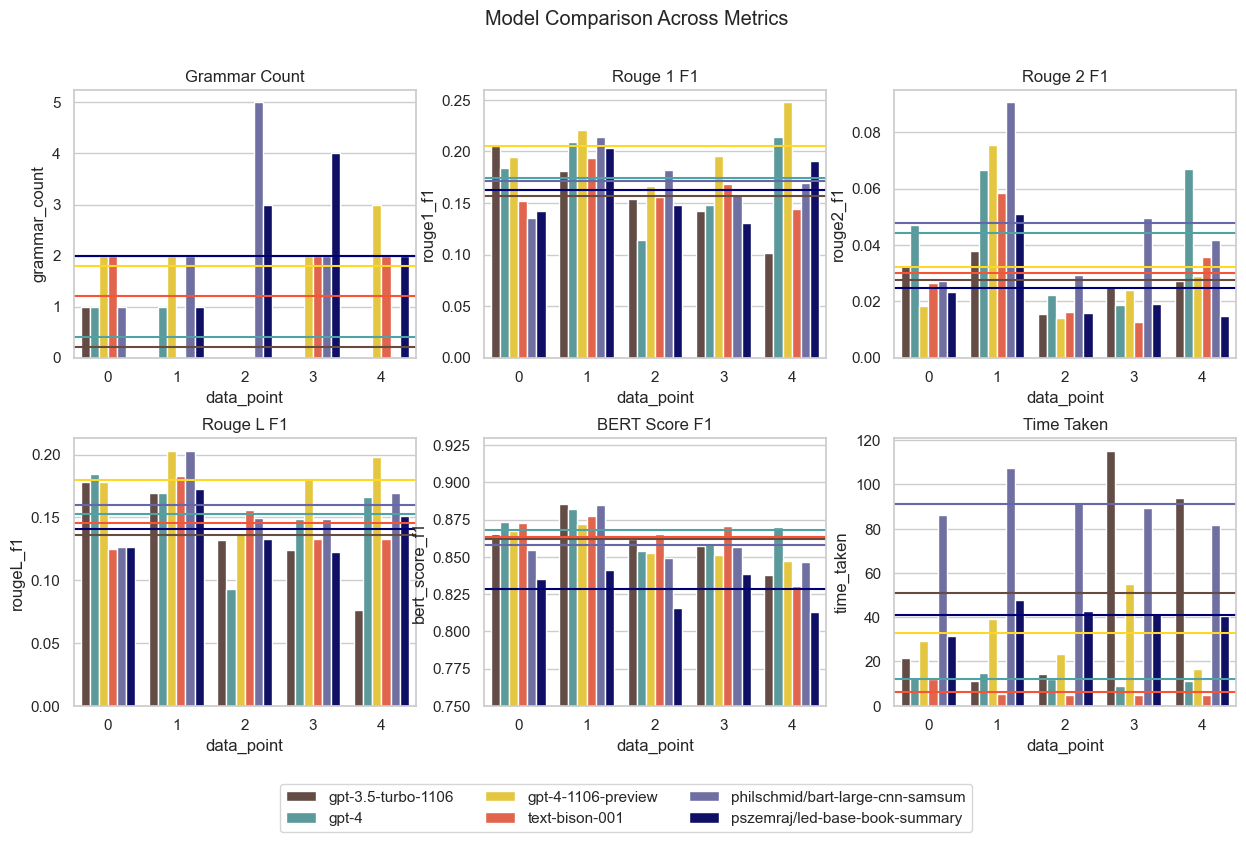

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame named 'df'
# Replace this with your actual DataFrame name if different
df = all_comparison

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Model Comparison Across Metrics')

# Plot grammar_count
sns.barplot(x='data_point', y='grammar_count', hue='model', data=df, ax=axes[0, 0], palette=palette, legend=False)
axes[0, 0].set_title('Grammar Count')

# Plot Rouge 1 F1
sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df, ax=axes[0, 1], palette=palette, legend=False)
axes[0, 1].set_title('Rouge 1 F1')

# Plot Rouge 2 F1
sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df, ax=axes[0, 2], palette=palette, legend=False)
axes[0, 2].set_title('Rouge 2 F1')

# Plot Rouge L F1
sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df, ax=axes[1, 0], palette=palette, legend=False)
axes[1, 0].set_title('Rouge L F1')

# Plot BERT Score F1
sns.barplot(x='data_point', y='bert_score_f1', hue='model', data=df, ax=axes[1, 1], palette=palette, legend=False)
axes[1, 1].set_ylim(0.75, None)
axes[1, 1].set_title('BERT Score F1')

# Plot Time Taken
sns.barplot(x='data_point', y='time_taken', hue='model', data=df, ax=axes[1, 2], palette=palette, legend=True)
axes[1, 2].set_title('Time Taken')

plt.legend(ncol=3, loc="lower right", bbox_to_anchor=(0.25, -0.5))


for ax in axes.flatten():
    for i, model in enumerate(df['model'].unique()):
        average_value = df[df['model'] == model][ax.get_ylabel()].mean()
        ax.axhline(average_value, color=palette[i], linewidth=1.5)

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()


### Section 2: Topics Comparison with BBC Dataset Summary

In [97]:
palette = sns.color_palette(["#674A40", "#50A3A4", "#FFD825", "#F95335", "#6667AB", "#a60000", "#F6C3FF", "#42d4f4"])
palette

[(0.403921568627451, 0.2901960784313726, 0.25098039215686274),
 (0.3137254901960784, 0.6392156862745098, 0.6431372549019608),
 (1.0, 0.8470588235294118, 0.1450980392156863),
 (0.9764705882352941, 0.3254901960784314, 0.20784313725490197),
 (0.4, 0.403921568627451, 0.6705882352941176),
 (0.6509803921568628, 0.0, 0.0),
 (0.9647058823529412, 0.7647058823529411, 1.0),
 (0.25882352941176473, 0.8313725490196079, 0.9568627450980393)]

##### Compare All Closed Source

In [98]:
close_source_topic_result = pd.read_excel("../Process/result/closed_source_model_topics_comparison.xlsx")

close_source_topic_result.head(1)

,model,method,max_tokens,topic,num_tokens,transcript,original summary,summary,grammar,readability,rouge,bert_score,time_taken,prompt,temperature,bleu
0,gpt-3.5-turbo-0125,MapReduce,16385,business,762,Cuba winds back economic clock..Fidel Castro's...,Fidel Castro's decision to ban all cash transa...,Cuba has imposed a 10% tax on conversions betw...,[],100 words required.,"[{'rouge-1': {'r': 0.17006802721088435, 'p': 0...","(tensor([0.9130]), tensor([0.8402]), tensor([0...",3.803998,Write a concise summary of the following: {text},0,0.016126


In [99]:
df = close_source_topic_result
print(df.shape)

df['bert_score'] = df['bert_score'].apply(readTensorsString)
df['readability_score'] = df['readability'].apply(getScore)
df['grammar'] = df['grammar'].apply(readGrammerList)
df['org_word_count'] = df['transcript'].apply(count_words)
df['sum_word_count'] = df['summary'].apply(count_words)

df_scores_processed = process_df(df)

df_scores_processed.head(1)

(150, 16)


,model,method,max_tokens,topic,num_tokens,transcript,original summary,summary,grammar,readability,...,temperature,bleu,readability_score,org_word_count,sum_word_count,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1
0,gpt-3.5-turbo-0125,MapReduce,16385,business,762,Cuba winds back economic clock..Fidel Castro's...,Fidel Castro's decision to ban all cash transa...,Cuba has imposed a 10% tax on conversions betw...,[],100 words required.,...,0,0.016126,NaN,635,62,0,0.25641,0.090909,0.235897,0.913


In [100]:
df_scores_processed['data_point'] = df_scores_processed.groupby('transcript').ngroup()


In [101]:
closed_source_topic_comparison = df_scores_processed[["model", "data_point", "topic" ,"time_taken", "grammar_count", "rouge1_f1", "rouge2_f1", "rougeL_f1", "bert_score_f1", "sum_word_count"]]
closed_source_topic_comparison = closed_source_topic_comparison.sort_values(by=[ 'topic','model' ,'data_point']).reset_index(drop=True)
closed_source_topic_comparison.head(10)

,model,data_point,topic,time_taken,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1,sum_word_count
0,chat-bison-001,1,business,3.089034,1,0.271186,0.088496,0.237288,0.8947,83
1,chat-bison-001,4,business,3.927313,2,0.211382,0.055402,0.178862,0.8935,82
2,chat-bison-001,5,business,4.720905,0,0.333333,0.124183,0.314815,0.8964,84
3,chat-bison-001,6,business,3.175083,0,0.215768,0.061972,0.207469,0.8794,87
4,chat-bison-001,24,business,3.023817,8,0.346667,0.164634,0.311111,0.9093,98
5,gemini-pro,1,business,3.651755,0,0.268398,0.067073,0.233766,0.8814,71
6,gemini-pro,4,business,3.709059,1,0.199203,0.033520,0.183267,0.8942,76
7,gemini-pro,5,business,6.246289,0,0.274112,0.077193,0.243655,0.8995,61
8,gemini-pro,6,business,3.378523,0,0.318725,0.108992,0.286853,0.9042,99
9,gemini-pro,24,business,3.557504,8,0.297297,0.108280,0.270270,0.9080,81


['business' 'entertainment' 'politics' 'sport' 'tech']


C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3176010676.py:25: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3176010676.py:29: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3176010676.py:33: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


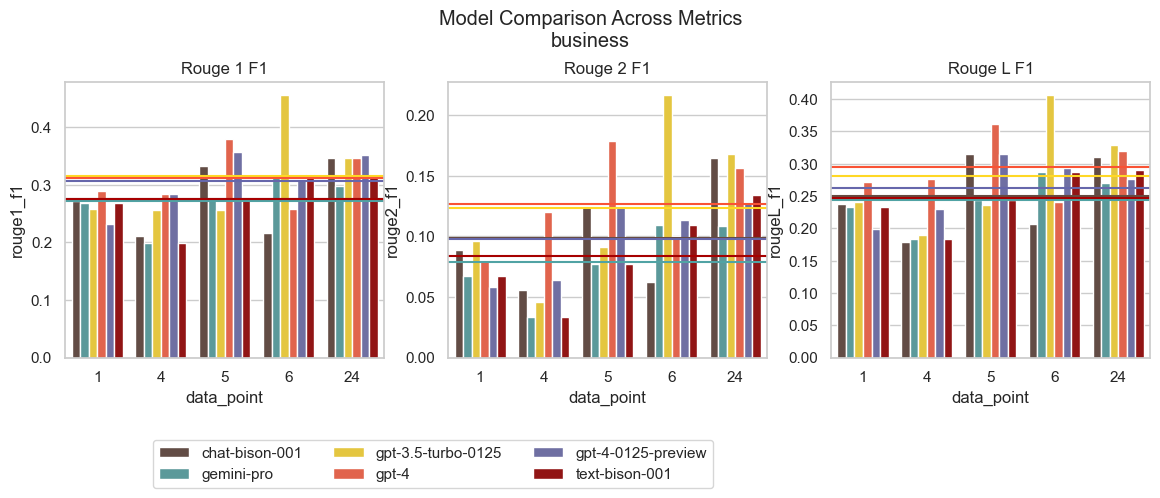

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3176010676.py:25: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3176010676.py:29: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3176010676.py:33: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


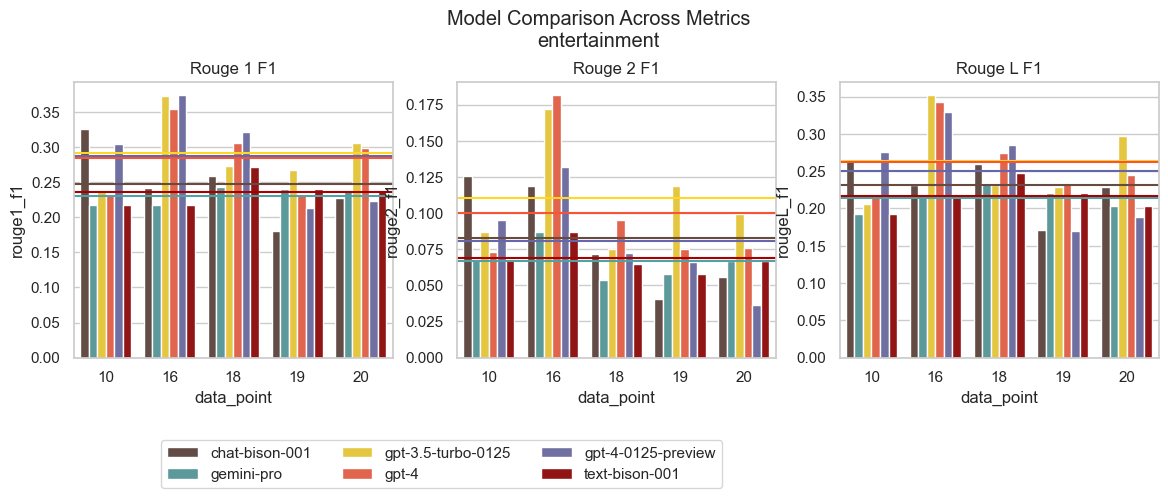

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3176010676.py:25: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3176010676.py:29: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3176010676.py:33: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


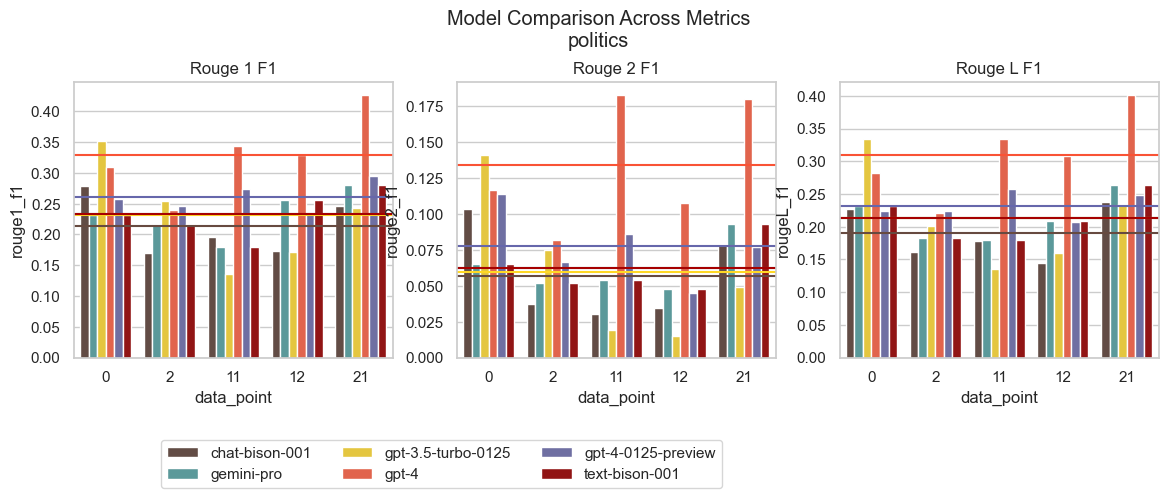

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3176010676.py:25: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3176010676.py:29: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3176010676.py:33: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


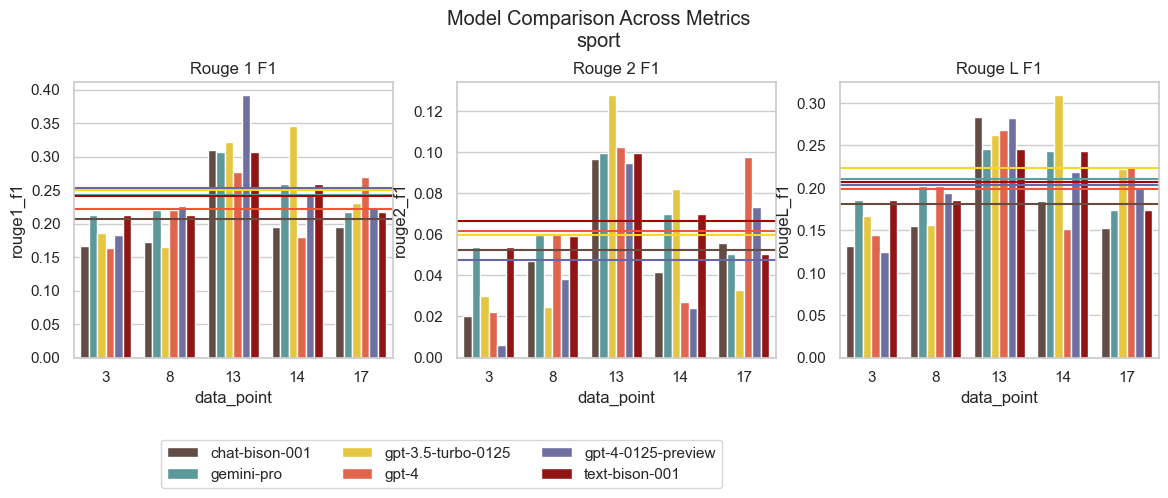

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3176010676.py:25: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3176010676.py:29: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3176010676.py:33: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


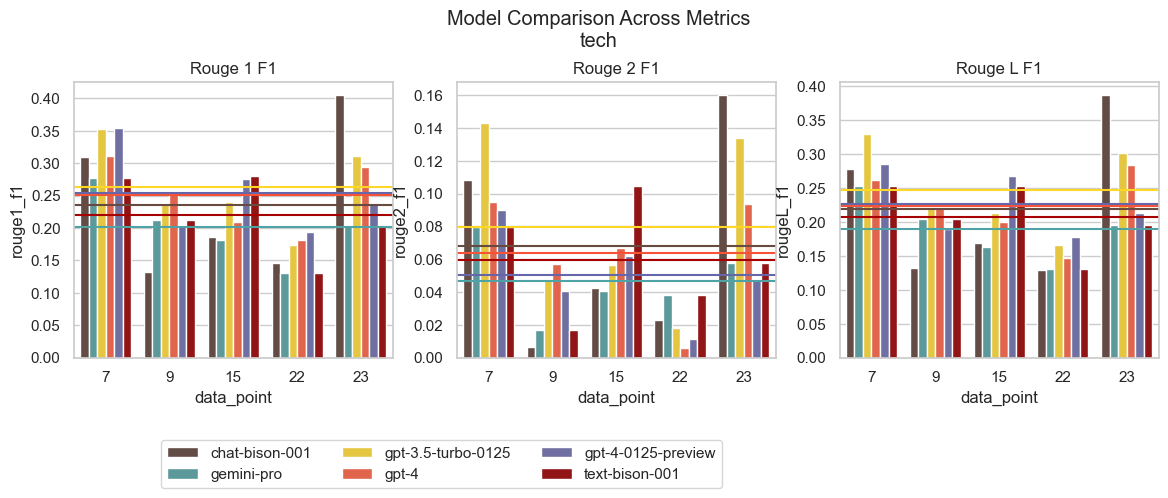

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame named 'df'
# Replace this with your actual DataFrame name if different
df = closed_source_topic_comparison

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")




unique_topics =df['topic'].unique()
print(unique_topics)

for topic in unique_topics:

    # Create subplots for each metric
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))  # Adjust figsize for reduced height
    plt.subplots_adjust(hspace=1.5)  # Increase hspace for more space between subplots
    fig.suptitle('Model Comparison Across Metrics\n' + topic)

    # Plot Rouge 1 F1
    sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
    axes[0].set_title('Rouge 1 F1')

    # Plot Rouge 2 F1
    sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
    axes[1].set_title('Rouge 2 F1')

    # Plot Rouge L F1
    sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)
    axes[2].set_title('Rouge L F1')

    for ax in axes.flatten():
        for i, model in enumerate(df['model'].unique()):
            average_value = df[(df["model"] == model) & (df["topic"] == topic)][ax.get_ylabel()].mean()
            ax.axhline(average_value, color=palette[i], linewidth=1.5)

    axes[0].legend(ncol=3, loc="lower left", bbox_to_anchor=(0.25, -0.5))
    fig.subplots_adjust(top=0.8)

    # plt.tight_layout()
    plt.show()

##### Compare ALl Open Source

In [103]:
open_source_topic_result = pd.read_excel("../Process/result/open_source_model_topics_comparison.xlsx")

open_source_topic_result.head(1)

,model,method,max_tokens,topic,transcript,original summary,summary,rouge,bert_score,bleu,time_taken,grammar,readability
0,pszemraj/led-base-book-summary,MapReduce,16384.0,business,Cuba winds back economic clock..Fidel Castro's...,Fidel Castro's decision to ban all cash transa...,The following is a summary of the announcement...,"[{'rouge-1': {'r': 0.38095238095238093, 'p': 0...","(tensor([0.8857]), tensor([0.8723]), tensor([0...",0.218163,19.899436,"[Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'me...","score: 13.012869198312234, grade_level: '13'"


In [104]:
df = open_source_topic_result
print(df.shape)

df['bert_score'] = df['bert_score'].apply(readTensorsString)
df['readability_score'] = df['readability'].apply(getScore)
df['grammar'] = df['grammar'].apply(readGrammerList)
df['org_word_count'] = df['transcript'].apply(count_words)
df['sum_word_count'] = df['summary'].apply(count_words)

df_scores_processed = process_df(df)

df_scores_processed.head(1)

(125, 13)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error processing grammar: unterminated s

,model,method,max_tokens,topic,transcript,original summary,summary,rouge,bert_score,bleu,...,grammar,readability,readability_score,org_word_count,sum_word_count,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1
0,pszemraj/led-base-book-summary,MapReduce,16384.0,business,Cuba winds back economic clock..Fidel Castro's...,Fidel Castro's decision to ban all cash transa...,The following is a summary of the announcement...,"[{'rouge-1': {'r': 0.38095238095238093, 'p': 0...","[0.8857, 0.8723, 0.8789]",0.218163,...,"[{'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message'...","score: 13.012869198312234, grade_level: '13'",13.012869,635,156,1,0.440945,0.274933,0.417323,0.8857


In [105]:
df_scores_processed['data_point'] = df_scores_processed.groupby('transcript').ngroup()


In [106]:
opened_source_topic_comparison = df_scores_processed[["model", "data_point", "topic" ,"time_taken", "grammar_count", "rouge1_f1", "rouge2_f1", "rougeL_f1", "bert_score_f1", "sum_word_count"]]
opened_source_topic_comparison = opened_source_topic_comparison.sort_values(by=[ 'topic','model' ,'data_point']).reset_index(drop=True)
opened_source_topic_comparison.head(10)

,model,data_point,topic,time_taken,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1,sum_word_count
0,HHousen/distil-led-large-cnn-16384,0,business,19.647717,3,0.260870,0.173913,0.260870,0.8762,44
1,HHousen/distil-led-large-cnn-16384,3,business,19.667305,4,0.398305,0.288235,0.398305,0.9286,60
2,HHousen/distil-led-large-cnn-16384,4,business,21.177337,2,0.389744,0.266187,0.389744,0.9249,56
3,HHousen/distil-led-large-cnn-16384,5,business,17.848128,3,0.349776,0.226300,0.331839,0.9012,58
4,HHousen/distil-led-large-cnn-16384,24,business,29.448294,5,0.252525,0.070423,0.222222,0.8758,56
5,philschmid/bart-large-cnn-samsum,0,business,17.588233,1,0.283105,0.167203,0.283105,0.9019,54
6,philschmid/bart-large-cnn-samsum,3,business,17.147833,3,0.295652,0.185629,0.278261,0.9216,51
7,philschmid/bart-large-cnn-samsum,4,business,23.241167,0,0.340206,0.172662,0.298969,0.9091,54
8,philschmid/bart-large-cnn-samsum,5,business,29.647085,0,0.437736,0.262467,0.430189,0.9042,114
9,philschmid/bart-large-cnn-samsum,24,business,18.754679,0,0.388060,0.233216,0.368159,0.9387,48


In [107]:
df['topic'].unique()

for topic in unique_topics:
    print(topic)

business
entertainment
politics
sport
tech


['business' 'entertainment' 'politics' 'sport' 'tech']


C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4238240151.py:25: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4238240151.py:29: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4238240151.py:33: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


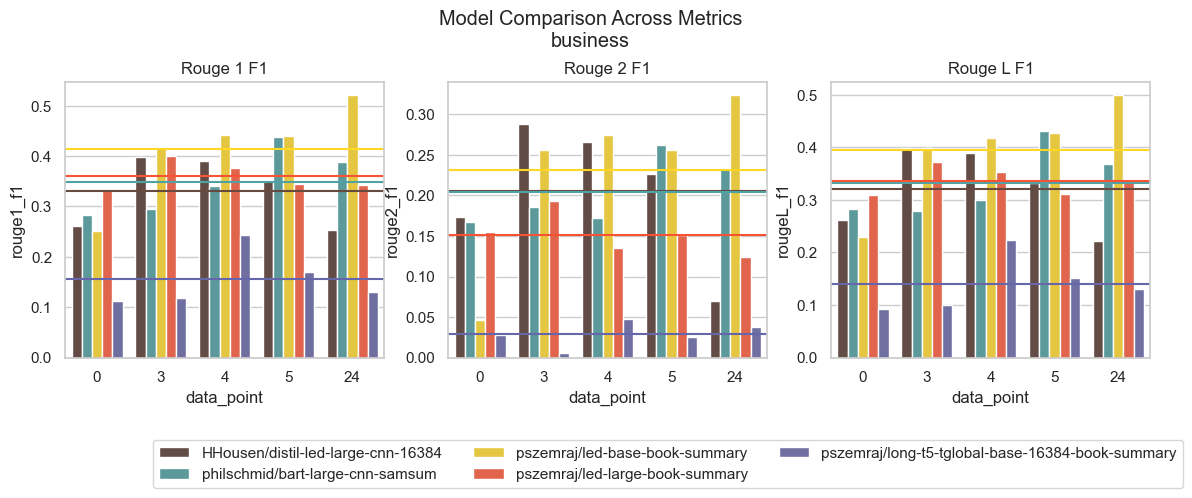

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4238240151.py:25: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4238240151.py:29: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4238240151.py:33: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


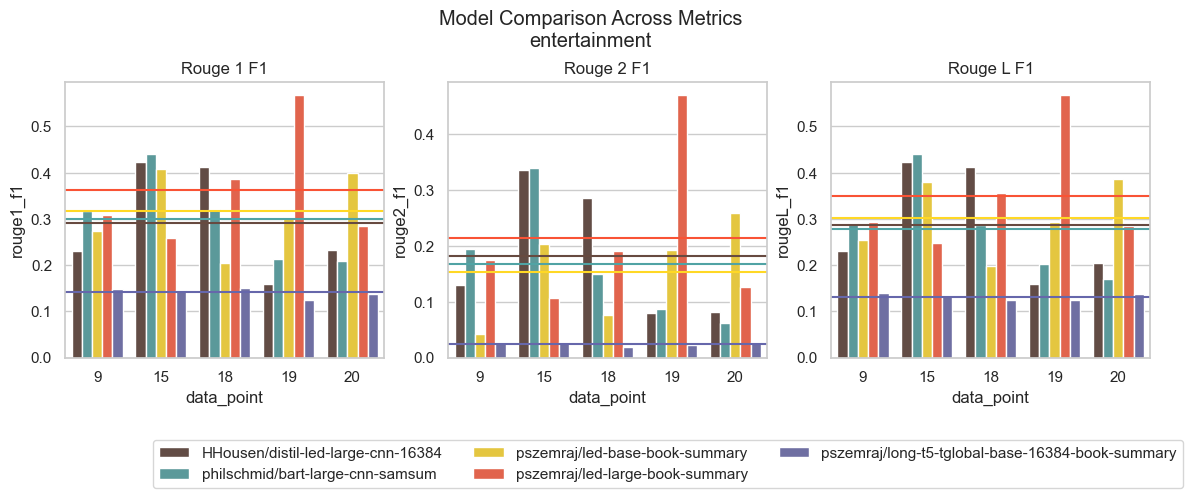

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4238240151.py:25: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4238240151.py:29: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4238240151.py:33: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


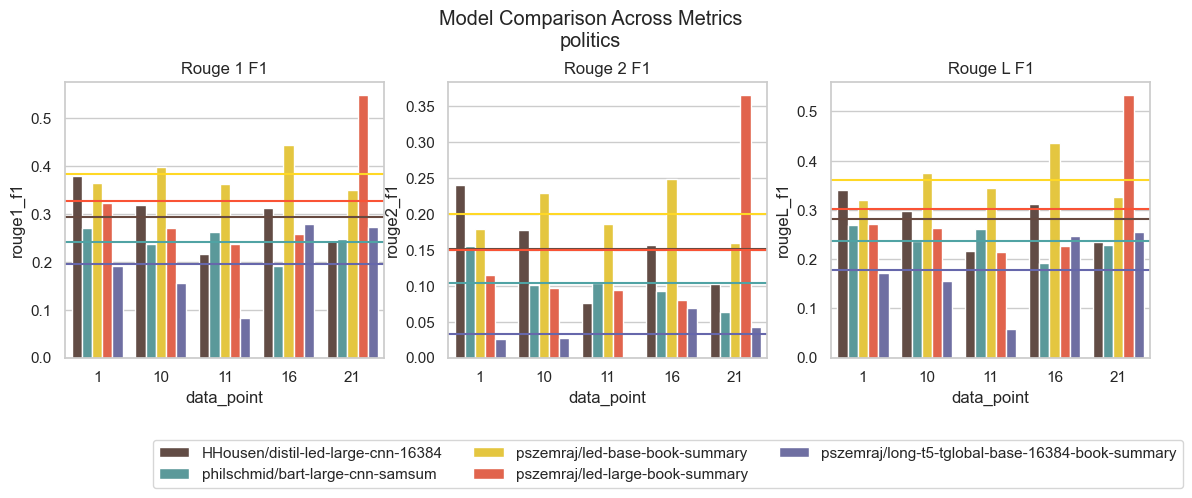

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4238240151.py:25: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4238240151.py:29: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4238240151.py:33: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


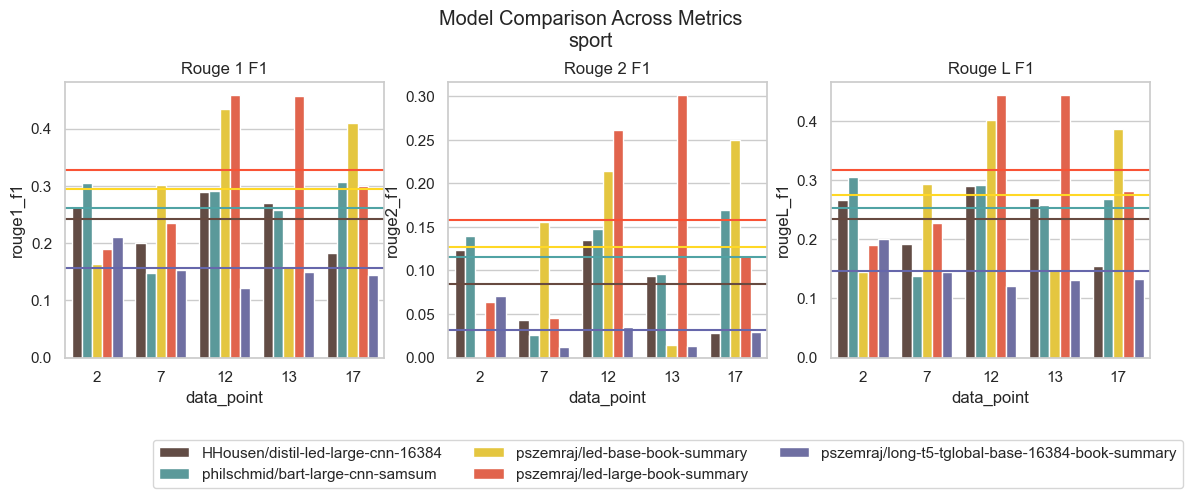

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4238240151.py:25: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4238240151.py:29: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4238240151.py:33: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


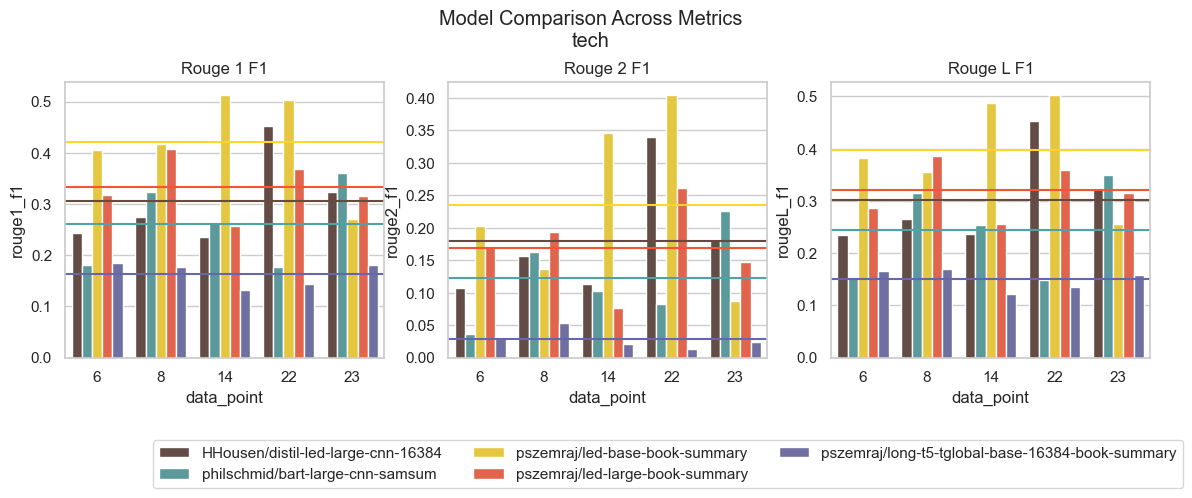

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame named 'df'
# Replace this with your actual DataFrame name if different
df = opened_source_topic_comparison

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")




unique_topics =df['topic'].unique()
print(unique_topics)

for topic in unique_topics:

    # Create subplots for each metric
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))  # Adjust figsize for reduced height
    plt.subplots_adjust(hspace=1.5)  # Increase hspace for more space between subplots
    fig.suptitle('Model Comparison Across Metrics\n' + topic)

    # Plot Rouge 1 F1
    sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
    axes[0].set_title('Rouge 1 F1')

    # Plot Rouge 2 F1
    sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
    axes[1].set_title('Rouge 2 F1')

    # Plot Rouge L F1
    sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)
    axes[2].set_title('Rouge L F1')

    for ax in axes.flatten():
        for i, model in enumerate(df['model'].unique()):
            average_value = df[(df["model"] == model) & (df["topic"] == topic)][ax.get_ylabel()].mean()
            ax.axhline(average_value, color=palette[i], linewidth=1.5)

    axes[0].legend(ncol=3, loc="lower left", bbox_to_anchor=(0.25, -0.5))
    fig.subplots_adjust(top=0.8)

    # plt.tight_layout()
    plt.show()

##### Topic Open & Close Source Comparison

In [9]:
close_source_topic_result = pd.read_excel("../Process/result/closed_source_model_topics_comparison.xlsx")
filtered_close_source_topic_result = close_source_topic_result[close_source_topic_result['model'].isin(['gpt-3.5-turbo-0125', 'gpt-4'])]

open_source_topic_result = pd.read_excel("../Process/result/open_source_model_topics_comparison.xlsx")
filtered_open_source_topic_result = open_source_topic_result[open_source_topic_result['model'].isin(['pszemraj/led-base-book-summary', 'pszemraj/led-large-book-summary'])]

concatenated_open_close_df = pd.concat([filtered_close_source_topic_result, filtered_open_source_topic_result])

concatenated_open_close_df.shape

(100, 16)

In [10]:
df = concatenated_open_close_df
print(df.shape)
df['bert_score'] = df['bert_score'].apply(readTensorsString)
df['readability_score'] = df['readability'].apply(getScore)
df['grammar'] = df['grammar'].apply(readGrammerList)
df['org_word_count'] = df['transcript'].apply(count_words)
df['sum_word_count'] = df['summary'].apply(count_words)

df_scores_processed = process_df(df)

df_scores_processed.head(1)

(100, 16)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)
Error processing grammar: unterminated string literal (detected at line 1) (<unknown>, line 1)


,model,method,max_tokens,topic,num_tokens,transcript,original summary,summary,grammar,readability,...,temperature,bleu,readability_score,org_word_count,sum_word_count,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1
0,gpt-3.5-turbo-0125,MapReduce,16385.0,business,762.0,Cuba winds back economic clock..Fidel Castro's...,Fidel Castro's decision to ban all cash transa...,Cuba has imposed a 10% tax on conversions betw...,[],100 words required.,...,0.0,0.016126,NaN,635,62,0,0.25641,0.090909,0.235897,0.913


In [11]:
df_scores_processed['data_point'] = df_scores_processed.groupby('transcript').ngroup()

In [12]:
open_close_source_topic_comparison = df_scores_processed[["model", "data_point", "topic" ,"time_taken", "grammar_count", "rouge1_f1", "rouge2_f1", "rougeL_f1", "bert_score_f1", "sum_word_count"]]
open_close_source_topic_comparison = open_close_source_topic_comparison.sort_values(by=[ 'topic','model' ,'data_point']).reset_index(drop=True)
open_close_source_topic_comparison.head(10)

,model,data_point,topic,time_taken,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1,sum_word_count
0,gpt-3.5-turbo-0125,1,business,3.315496,1,0.258621,0.096096,0.241379,0.8955,77
1,gpt-3.5-turbo-0125,4,business,4.086646,2,0.256198,0.045455,0.190083,0.8860,70
2,gpt-3.5-turbo-0125,5,business,3.803998,0,0.256410,0.090909,0.235897,0.9130,62
3,gpt-3.5-turbo-0125,6,business,3.256271,0,0.456432,0.216667,0.406639,0.9042,90
4,gpt-3.5-turbo-0125,25,business,3.129471,6,0.347032,0.167742,0.328767,0.9089,78
5,gpt-4,1,business,24.204314,0,0.289474,0.080495,0.271930,0.9036,67
6,gpt-4,4,business,36.768745,3,0.284615,0.120104,0.276923,0.8989,101
7,gpt-4,5,business,23.107573,0,0.379630,0.178344,0.361111,0.9255,91
8,gpt-4,6,business,26.604083,1,0.258621,0.100000,0.241379,0.9069,75
9,gpt-4,25,business,21.092854,4,0.347032,0.156250,0.319635,0.9112,90


['business' 'entertainment' 'politics' 'sport' 'tech']


C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_13640\3768109382.py:25: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_13640\3768109382.py:29: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_13640\3768109382.py:33: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


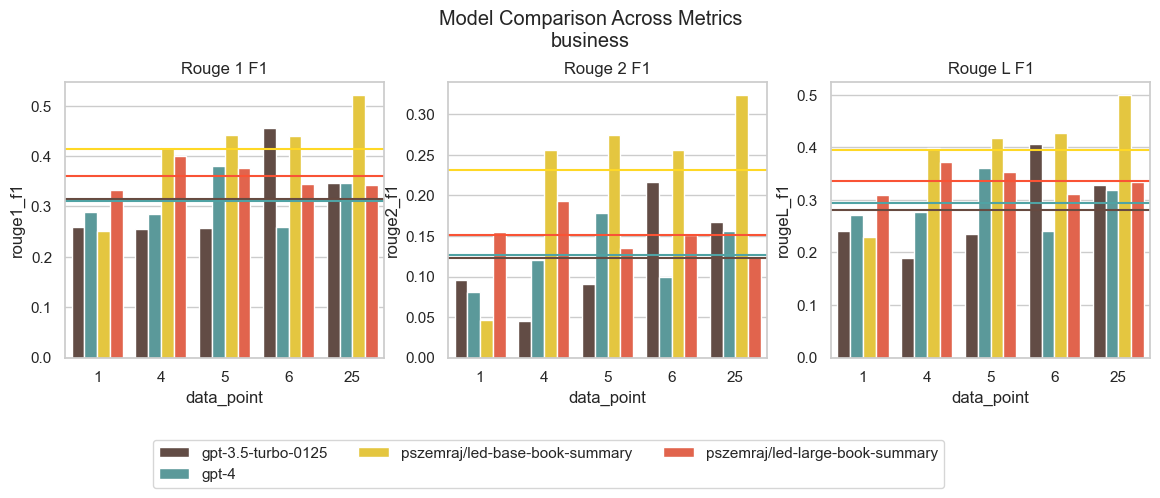

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_13640\3768109382.py:25: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_13640\3768109382.py:29: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_13640\3768109382.py:33: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


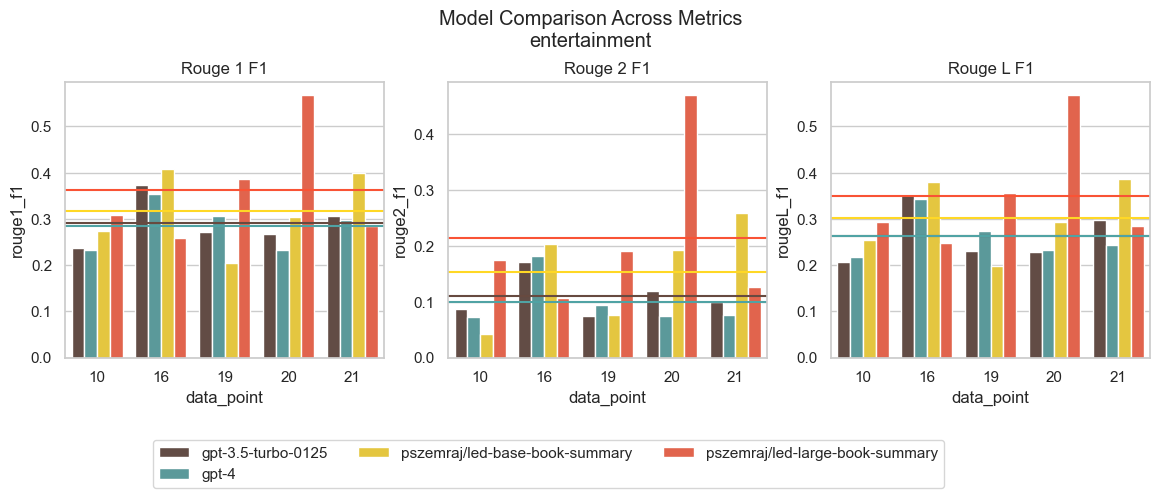

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_13640\3768109382.py:25: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_13640\3768109382.py:29: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_13640\3768109382.py:33: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


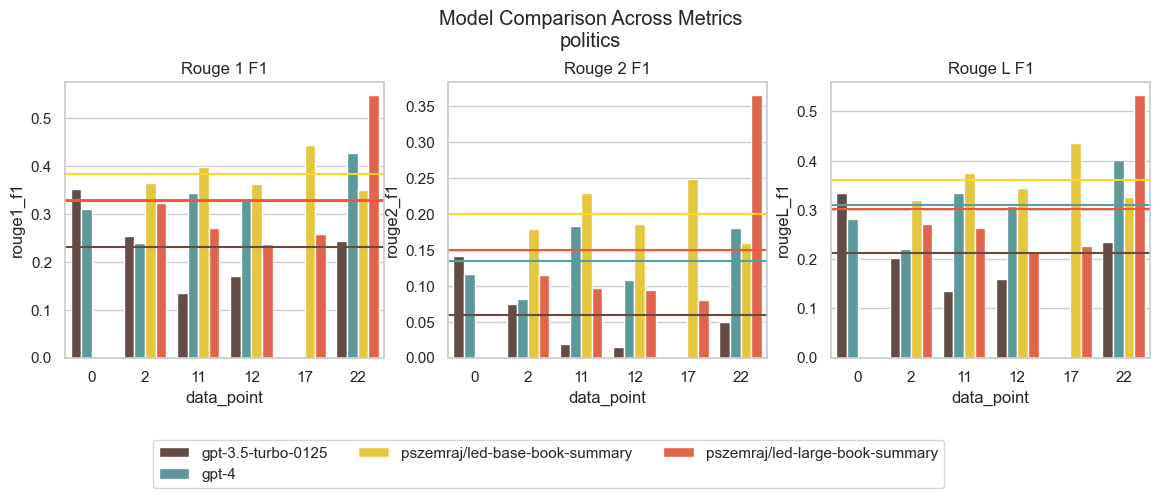

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_13640\3768109382.py:25: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_13640\3768109382.py:29: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_13640\3768109382.py:33: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


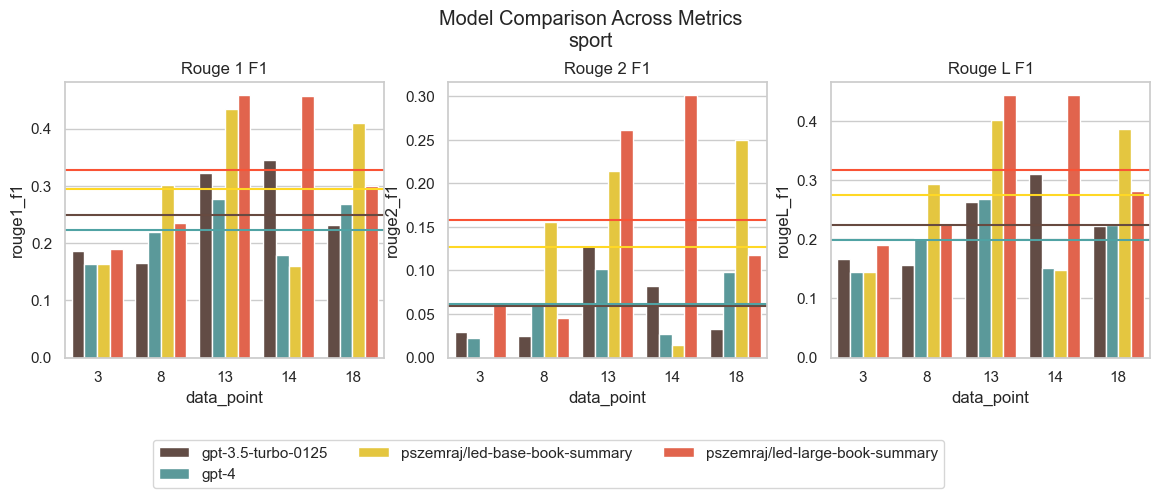

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_13640\3768109382.py:25: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_13640\3768109382.py:29: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_13640\3768109382.py:33: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


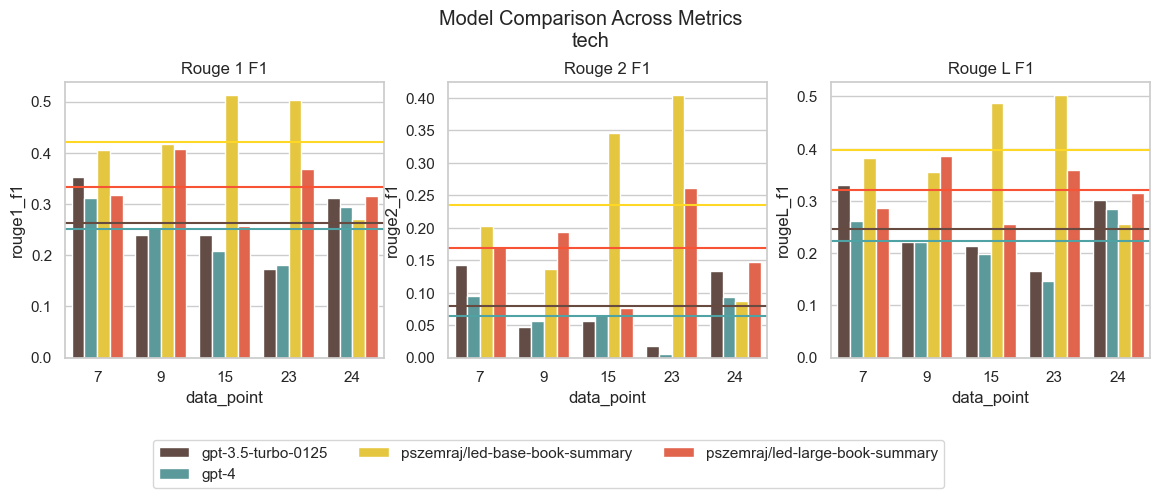

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame named 'df'
# Replace this with your actual DataFrame name if different
df = open_close_source_topic_comparison

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")




unique_topics =df['topic'].unique()
print(unique_topics)

for topic in unique_topics:

    # Create subplots for each metric
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))  # Adjust figsize for reduced height
    plt.subplots_adjust(hspace=1.5)  # Increase hspace for more space between subplots
    fig.suptitle('Model Comparison Across Metrics\n' + topic)

    # Plot Rouge 1 F1
    sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
    axes[0].set_title('Rouge 1 F1')

    # Plot Rouge 2 F1
    sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
    axes[1].set_title('Rouge 2 F1')

    # Plot Rouge L F1
    sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)
    axes[2].set_title('Rouge L F1')

    for ax in axes.flatten():
        for i, model in enumerate(df['model'].unique()):
            average_value = df[(df["model"] == model) & (df["topic"] == topic)][ax.get_ylabel()].mean()
            ax.axhline(average_value, color=palette[i], linewidth=1.5)

    axes[0].legend(ncol=3, loc="lower left", bbox_to_anchor=(0.25, -0.5))
    fig.subplots_adjust(top=0.8)

    # plt.tight_layout()
    plt.show()

##### RAG VS Full Model

In [144]:
close_source_rag_topic_result = pd.read_excel("../Process/result/closed_source_model_rag_topic_comparison.xlsx")
close_source_rag_topic_result['model'] = close_source_rag_topic_result['model'].replace('gpt-3.5-turbo-0125', 'gpt-3.5-turbo-0125-rag')

close_source_topic_result = pd.read_excel("../Process/result/closed_source_model_topics_comparison.xlsx")

In [145]:
close_source_rag_topic_result['model'].unique()

array(['gpt-3.5-turbo-0125-rag'], dtype=object)

In [146]:
close_source_topic_result['model'].unique()

array(['gpt-3.5-turbo-0125', 'gpt-4', 'gpt-4-0125-preview', 'gemini-pro',
       'chat-bison-001', 'text-bison-001'], dtype=object)

In [147]:
# Concatenate the two dataframes

concatenated_df = pd.concat([close_source_rag_topic_result, close_source_topic_result])

# Filter the concatenated dataframe based on the "model" column
# close_source_method_comparison = concatenated_df[concatenated_df['model'] == 'gpt-3.5-turbo-0125']
close_source_method_comparison = concatenated_df[concatenated_df['model'].str.contains('gpt-3.5-turbo-0125')]

print(close_source_method_comparison['model'].unique())

close_source_method_comparison.shape

['gpt-3.5-turbo-0125-rag' 'gpt-3.5-turbo-0125']


(50, 16)

In [148]:
df = close_source_method_comparison
print(df.shape)
df['bert_score'] = df['bert_score'].apply(readTensorsString)
df['readability_score'] = df['readability'].apply(getScore)
df['grammar'] = df['grammar'].apply(readGrammerList)
df['org_word_count'] = df['transcript'].apply(count_words)
df['sum_word_count'] = df['summary'].apply(count_words)

df_scores_processed = process_df(df)

df_scores_processed.head(1)

(50, 16)


C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3147659891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bert_score'] = df['bert_score'].apply(readTensorsString)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3147659891.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['readability_score'] = df['readability'].apply(getScore)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\3147659891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,model,method,max_tokens,topic,num_tokens,transcript,original summary,summary,grammar,readability,...,temperature,bleu,readability_score,org_word_count,sum_word_count,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1
0,gpt-3.5-turbo-0125-rag,RAG,16385,business,762,Cuba winds back economic clock..Fidel Castro's...,Fidel Castro's decision to ban all cash transa...,Cuba has implemented a 10% tax on US dollar co...,[],100 words required.,...,0,0.006625,NaN,635,56,0,0.248705,0.071685,0.238342,0.9078


In [149]:
df_scores_processed['data_point'] = df_scores_processed.groupby('transcript').ngroup()

In [150]:
close_source_method_comparison = df_scores_processed[["model", "data_point", "topic" ,"time_taken", "grammar_count", "rouge1_f1", "rouge2_f1", "rougeL_f1", "bert_score_f1", "sum_word_count"]]
close_source_method_comparison = close_source_method_comparison.sort_values(by=[ 'topic','model' ,'data_point']).reset_index(drop=True)
close_source_method_comparison.head(10)

,model,data_point,topic,time_taken,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1,sum_word_count
0,gpt-3.5-turbo-0125,1,business,3.315496,1,0.258621,0.096096,0.241379,0.8955,77
1,gpt-3.5-turbo-0125,4,business,4.086646,2,0.256198,0.045455,0.190083,0.8860,70
2,gpt-3.5-turbo-0125,5,business,3.803998,0,0.256410,0.090909,0.235897,0.9130,62
3,gpt-3.5-turbo-0125,6,business,3.256271,0,0.456432,0.216667,0.406639,0.9042,90
4,gpt-3.5-turbo-0125,24,business,3.129471,6,0.347032,0.167742,0.328767,0.9089,78
5,gpt-3.5-turbo-0125-rag,1,business,2.553971,0,0.253394,0.056075,0.226244,0.8956,65
6,gpt-3.5-turbo-0125-rag,4,business,3.228031,2,0.236220,0.048518,0.196850,0.8871,91
7,gpt-3.5-turbo-0125-rag,5,business,4.644140,0,0.248705,0.071685,0.238342,0.9078,56
8,gpt-3.5-turbo-0125-rag,6,business,2.945491,0,0.341463,0.128492,0.308943,0.8766,87
9,gpt-3.5-turbo-0125-rag,24,business,3.306527,4,0.308411,0.116129,0.271028,0.9003,77


['business' 'entertainment' 'politics' 'sport' 'tech']


C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4020963434.py:25: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4020963434.py:29: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4020963434.py:33: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


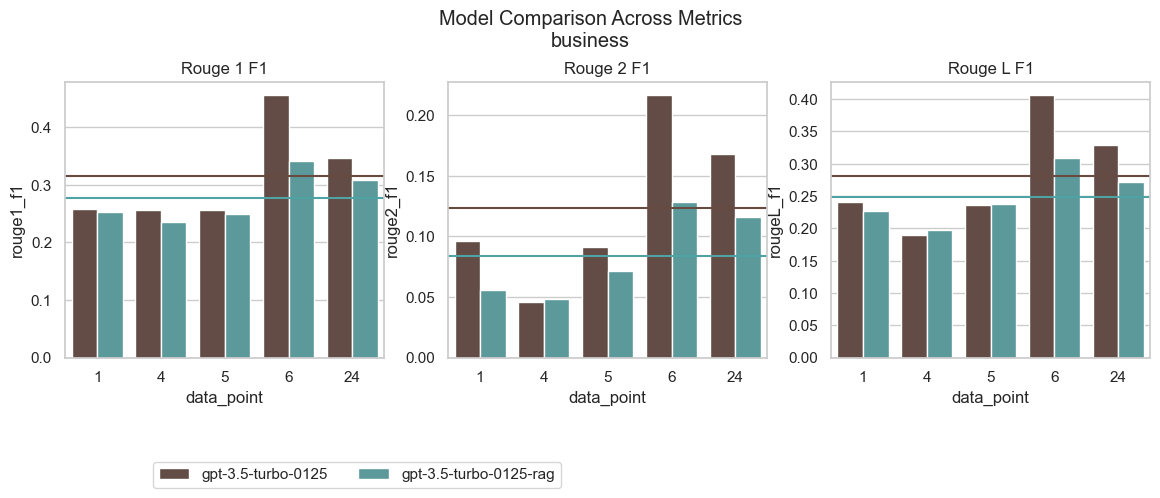

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4020963434.py:25: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4020963434.py:29: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4020963434.py:33: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


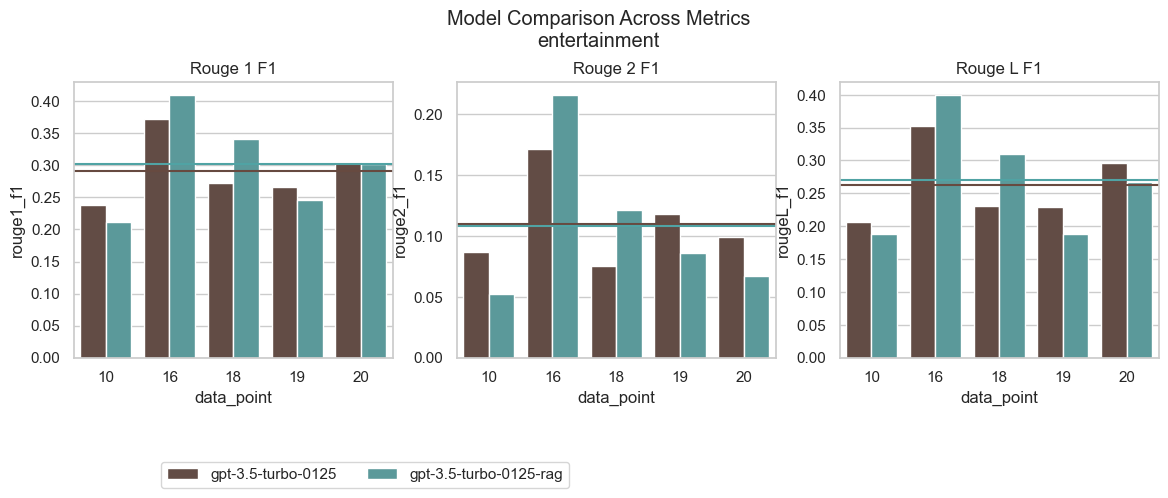

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4020963434.py:25: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4020963434.py:29: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4020963434.py:33: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


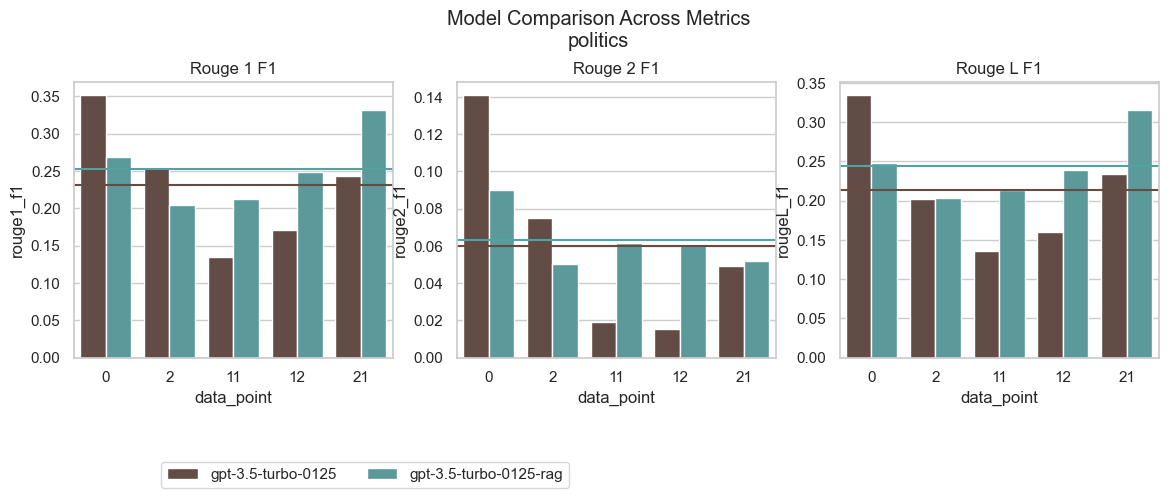

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4020963434.py:25: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4020963434.py:29: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4020963434.py:33: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


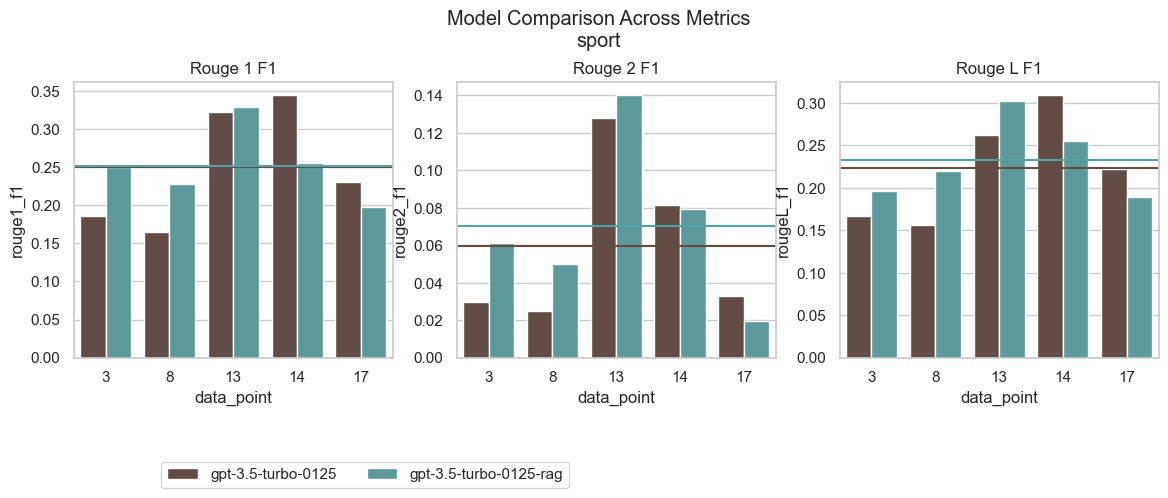

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4020963434.py:25: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4020963434.py:29: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\4020963434.py:33: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


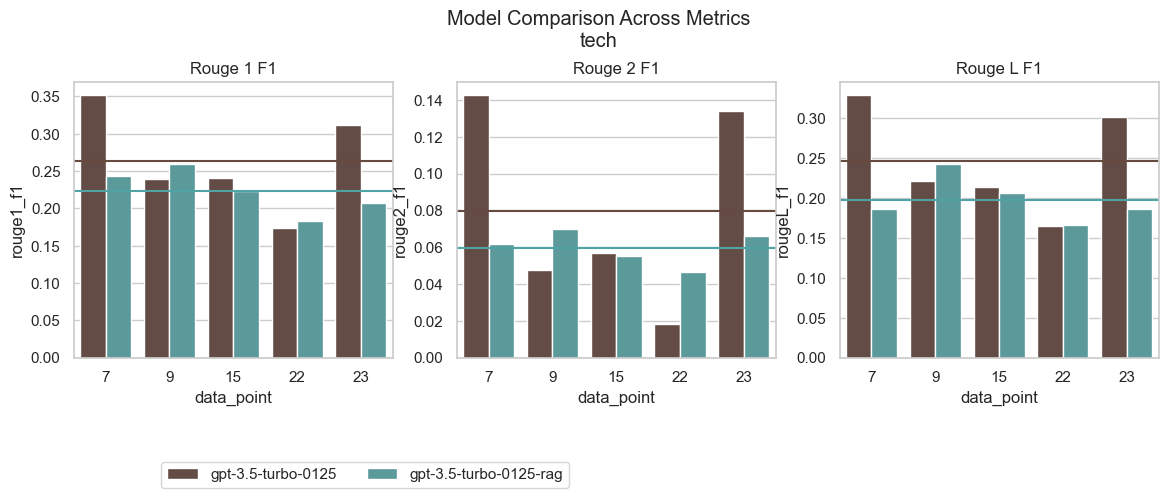

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame named 'df'
# Replace this with your actual DataFrame name if different
df = close_source_method_comparison

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")




unique_topics =df['topic'].unique()
print(unique_topics)

for topic in unique_topics:

    # Create subplots for each metric
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))  # Adjust figsize for reduced height
    plt.subplots_adjust(hspace=1.5)  # Increase hspace for more space between subplots
    fig.suptitle('Model Comparison Across Metrics\n' + topic)

    # Plot Rouge 1 F1
    sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
    axes[0].set_title('Rouge 1 F1')

    # Plot Rouge 2 F1
    sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
    axes[1].set_title('Rouge 2 F1')

    # Plot Rouge L F1
    sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)
    axes[2].set_title('Rouge L F1')

    for ax in axes.flatten():
        for i, model in enumerate(df['model'].unique()):
            average_value = df[(df["model"] == model) & (df["topic"] == topic)][ax.get_ylabel()].mean()
            ax.axhline(average_value, color=palette[i], linewidth=1.5)

    axes[0].legend(ncol=3, loc="lower left", bbox_to_anchor=(0.25, -0.5))
    fig.subplots_adjust(top=0.8)

    # plt.tight_layout()
    plt.show()

##### RAG Topic Comparison

Compare between RAG models

!Note "gemini-pro" with RAG having issue with summary.

In [109]:
close_source_rag_topic_result = pd.read_excel("../Process/result/closed_source_model_rag_topic_comparison.xlsx")
close_source_rag_topic_result.shape

(50, 16)

In [110]:
df = close_source_rag_topic_result
print(df.shape)
df['bert_score'] = df['bert_score'].apply(readTensorsString)
df['readability_score'] = df['readability'].apply(getScore)
df['grammar'] = df['grammar'].apply(readGrammerList)
df['org_word_count'] = df['transcript'].apply(count_words)
df['sum_word_count'] = df['summary'].apply(count_words)

df_scores_processed = process_df(df)

df_scores_processed.head(1)

(50, 16)


,model,method,max_tokens,topic,num_tokens,transcript,original summary,summary,grammar,readability,...,temperature,bleu,readability_score,org_word_count,sum_word_count,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1
0,gpt-3.5-turbo-1106,RAG,16385,business,762,Cuba winds back economic clock..Fidel Castro's...,Fidel Castro's decision to ban all cash transa...,Tony Blair's recent speech is seen as the star...,"[{'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message'...",100 words required.,...,0,4.364516e-79,NaN,635,95,3,0.163636,0.025157,0.163636,0.841


In [111]:
df_scores_processed['data_point'] = df_scores_processed.groupby('transcript').ngroup()

In [112]:
closed_source_rag_topic_comparison = df_scores_processed[["model", "data_point", "topic" ,"time_taken", "grammar_count", "rouge1_f1", "rouge2_f1", "rougeL_f1", "bert_score_f1", "sum_word_count"]]
closed_source_rag_topic_comparison = closed_source_rag_topic_comparison.sort_values(by=[ 'topic','model' ,'data_point']).reset_index(drop=True)
closed_source_rag_topic_comparison.head(10)

,model,data_point,topic,time_taken,grammar_count,rouge1_f1,rouge2_f1,rougeL_f1,bert_score_f1,sum_word_count
0,gemini-pro,1,business,4.471025,0,0.022222,0.000000,0.022222,0.8373,10
1,gemini-pro,4,business,5.131924,0,0.010204,0.000000,0.010204,0.8365,10
2,gemini-pro,5,business,13.708216,0,0.038217,0.000000,0.038217,0.8335,10
3,gemini-pro,6,business,21.315707,0,0.043011,0.014184,0.043011,0.8435,10
4,gemini-pro,24,business,4.206539,0,0.035928,0.000000,0.035928,0.8367,10
5,gpt-3.5-turbo-1106,1,business,5.630093,3,0.121457,0.011173,0.113360,0.8234,103
6,gpt-3.5-turbo-1106,4,business,4.722778,3,0.116732,0.005333,0.101167,0.8292,93
7,gpt-3.5-turbo-1106,5,business,2.932420,3,0.163636,0.025157,0.163636,0.8410,95
8,gpt-3.5-turbo-1106,6,business,4.558422,3,0.113821,0.011111,0.113821,0.8246,89
9,gpt-3.5-turbo-1106,24,business,3.287850,3,0.127273,0.000000,0.100000,0.8312,84


['business' 'entertainment' 'politics' 'sport' 'tech']


C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1952036162.py:25: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1952036162.py:29: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1952036162.py:33: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


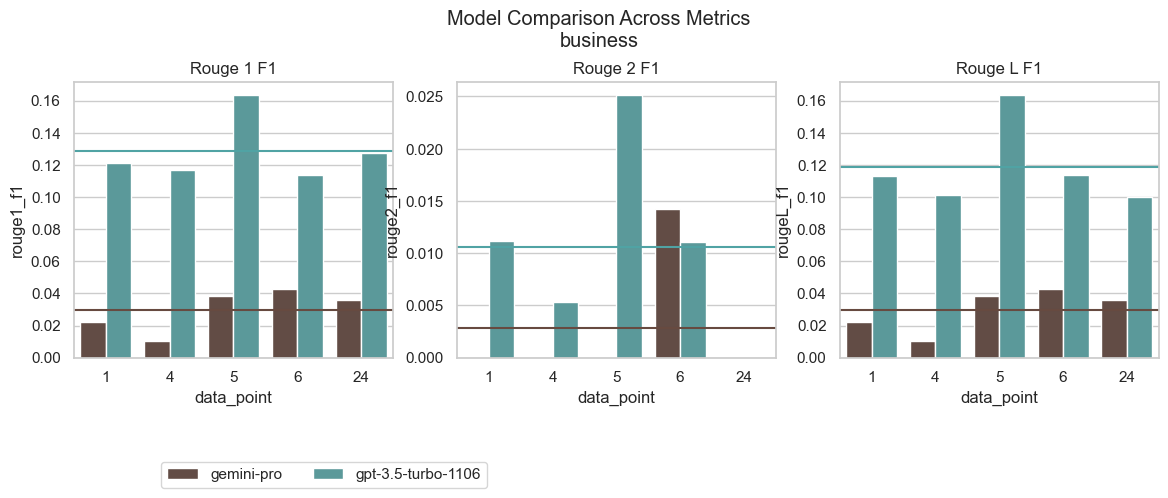

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1952036162.py:25: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1952036162.py:29: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1952036162.py:33: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


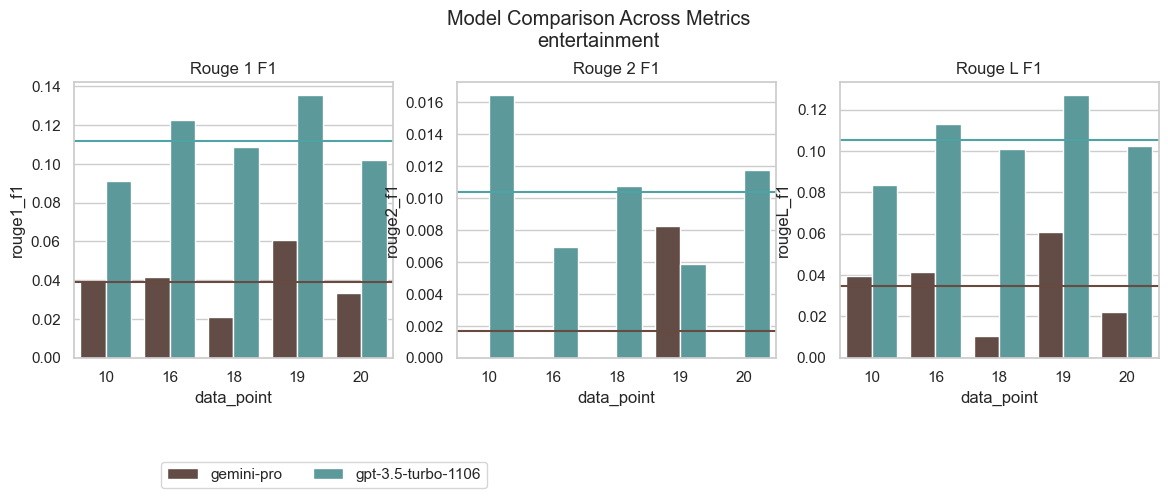

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1952036162.py:25: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1952036162.py:29: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1952036162.py:33: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


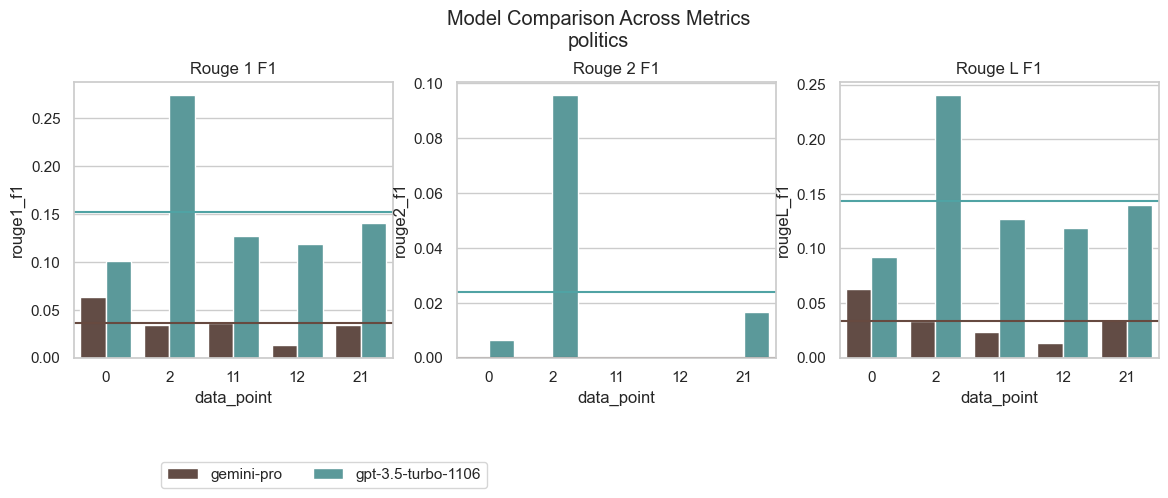

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1952036162.py:25: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1952036162.py:29: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1952036162.py:33: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


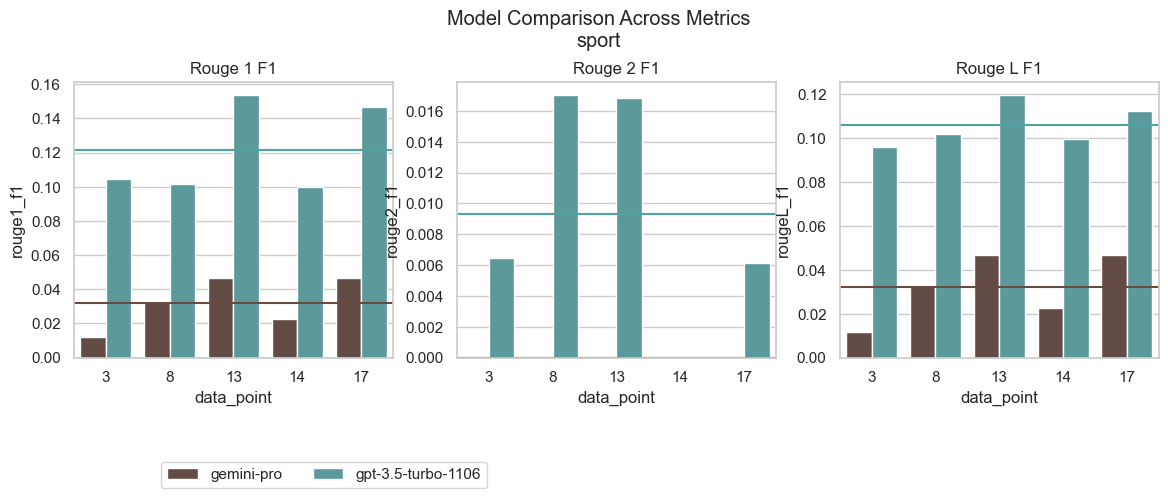

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1952036162.py:25: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1952036162.py:29: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\1952036162.py:33: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)


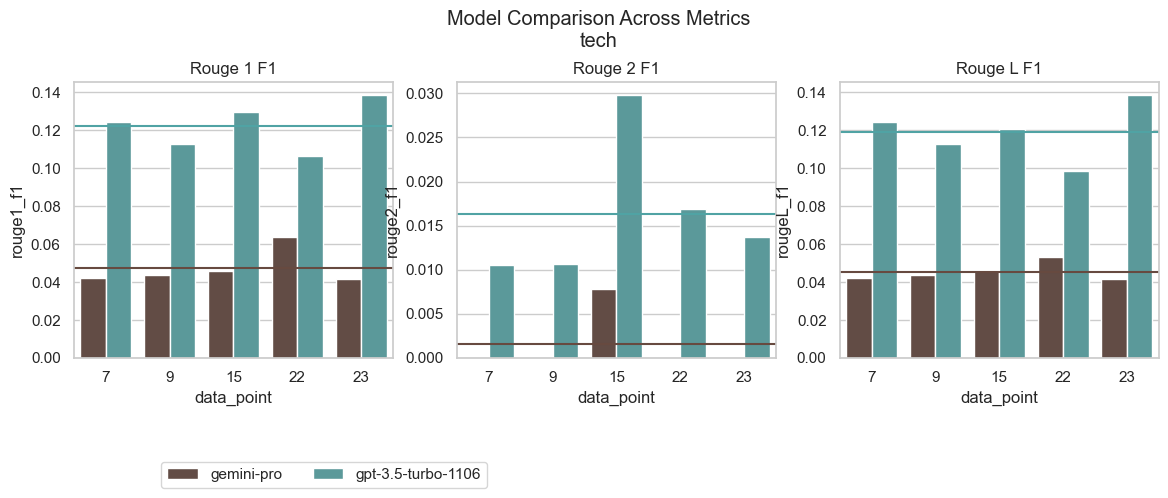

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame named 'df'
# Replace this with your actual DataFrame name if different
df = closed_source_rag_topic_comparison

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")




unique_topics =df['topic'].unique()
print(unique_topics)

for topic in unique_topics:

    # Create subplots for each metric
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 4))  # Adjust figsize for reduced height
    plt.subplots_adjust(hspace=1.5)  # Increase hspace for more space between subplots
    fig.suptitle('Model Comparison Across Metrics\n' + topic)

    # Plot Rouge 1 F1
    sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df[df['topic'] == topic], ax=axes[0], palette=palette, legend=True)
    axes[0].set_title('Rouge 1 F1')

    # Plot Rouge 2 F1
    sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df[df['topic'] == topic], ax=axes[1], palette=palette, legend=False)
    axes[1].set_title('Rouge 2 F1')

    # Plot Rouge L F1
    sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df[df['topic'] == topic], ax=axes[2], palette=palette, legend=False)
    axes[2].set_title('Rouge L F1')

    for ax in axes.flatten():
        for i, model in enumerate(df['model'].unique()):
            average_value = df[(df["model"] == model) & (df["topic"] == topic)][ax.get_ylabel()].mean()
            ax.axhline(average_value, color=palette[i], linewidth=1.5)

    axes[0].legend(ncol=3, loc="lower left", bbox_to_anchor=(0.25, -0.5))
    fig.subplots_adjust(top=0.8)

    # plt.tight_layout()
    plt.show()

C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\622394083.py:17: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='grammar_count', hue='model', data=df, ax=axes[0, 0], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\622394083.py:21: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df, ax=axes[0, 1], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\622394083.py:25: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df, ax=axes[0, 2], palette=palette, legend=False)
C:\Users\Zhang Xiang\AppData\Local\Temp\ipykernel_28188\622394083.py:29: UserWarning: The palette list has more values (8) than needed (2), which may not be

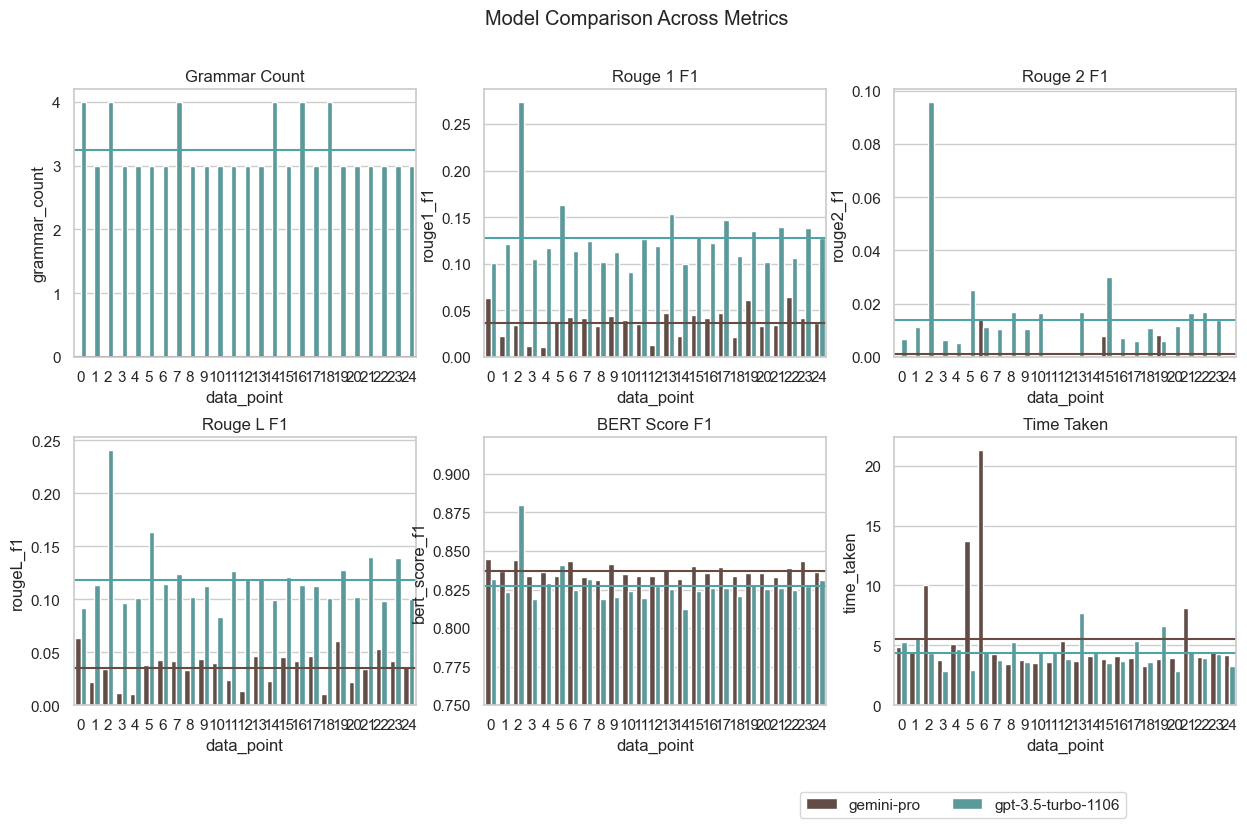

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame named 'df'
# Replace this with your actual DataFrame name if different
df = closed_source_rag_topic_comparison

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.subplots_adjust(hspace=0.3)
fig.suptitle('Model Comparison Across Metrics')

# Plot grammar_count
sns.barplot(x='data_point', y='grammar_count', hue='model', data=df, ax=axes[0, 0], palette=palette, legend=False)
axes[0, 0].set_title('Grammar Count')

# Plot Rouge 1 F1
sns.barplot(x='data_point', y='rouge1_f1', hue='model', data=df, ax=axes[0, 1], palette=palette, legend=False)
axes[0, 1].set_title('Rouge 1 F1')

# Plot Rouge 2 F1
sns.barplot(x='data_point', y='rouge2_f1', hue='model', data=df, ax=axes[0, 2], palette=palette, legend=False)
axes[0, 2].set_title('Rouge 2 F1')

# Plot Rouge L F1
sns.barplot(x='data_point', y='rougeL_f1', hue='model', data=df, ax=axes[1, 0], palette=palette, legend=False)
axes[1, 0].set_title('Rouge L F1')

# Plot BERT Score F1
sns.barplot(x='data_point', y='bert_score_f1', hue='model', data=df, ax=axes[1, 1], palette=palette, legend=False)
axes[1, 1].set_ylim(0.75, None)
axes[1, 1].set_title('BERT Score F1')

# Plot Time Taken
sns.barplot(x='data_point', y='time_taken', hue='model', data=df, ax=axes[1, 2], palette=palette, legend=True)
axes[1, 2].set_title('Time Taken')

plt.legend(ncol=len(df.columns)/2, loc="lower right", bbox_to_anchor=(0.7, -0.45))

for ax in axes.flatten():
    for i, model in enumerate(df['model'].unique()):
        average_value = df[df['model'] == model][ax.get_ylabel()].mean()
        ax.axhline(average_value, color=palette[i], linewidth=1.5)

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()